# Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

# Definitions of Churn
There are various ways to define churn, such as:

**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as "customers who have generated less than INR 4 per month in total/ average/ median revenue".

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, we will use the usage-based definition to define churn.

 

**High-value Churn:** In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

# Understanding the Business Objective and the Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

# Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

1. The **good** phase: In this phase, the customer is happy with the service and behaves as usual.

2. The **action** phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. The **churn** phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since we are working over a four-month window, the first two months are the **good** phase, the third month is the **action** phase, while the fourth month is the **churn** phase.

# Data Dictionary
| Acronyms      | Descriptions                                                                         |
|---------------|:--------------------------------------------------------------------------------------|
| MOBILE_NUMBER | Customer phone number                                                                |
| CIRCLE_ID     | Telecom circle area to which the customer belongs to                                 |
| LOC           | Local calls - within same telecom circle                                             |
| STD           | STD calls - outside the calling circle                                               |
| IC            | Incoming calls                                                                       |
| OG            | Outgoing calls                                                                       |
| T2T           | Operator T to T, i.e. within same operator (mobile to mobile)                        |
| T2M           | Operator T to other operator mobile                                                  |
| T2O           | Operator T to other operator fixed line                                              |
| T2F           | Operator T to fixed lines of T                                                       |
| T2C           | Operator T to it’s own call center                                                   |
| ARPU          | Average revenue per user                                                             |
| MOU           | Minutes of usage - voice calls                                                       |
| AON           | Age on network - number of days the customer is using the   operator T network       |
| ONNET         | All kind of calls within the same operator network                                   |
| OFFNET        | All kind of calls outside the operator T network                                     |
| ROAM          | Indicates that customer is in roaming zone during the call                           |
| SPL           | Special calls                                                                        |
| ISD           | ISD calls                                                                            |
| RECH          | Recharge                                                                             |
| NUM           | Number                                                                               |
| AMT           | Amount in local currency                                                             |
| MAX           | Maximum                                                                              |
| DATA          | Mobile internet                                                                      |
| 3G            | 3G network                                                                           |
| AV            | Average                                                                              |
| VOL           | Mobile internet usage volume (in MB)                                                 |
| 2G            | 2G network                                                                           |
| PCK           | Prepaid service schemes called - PACKS                                               |
| NIGHT         | Scheme to use during specific night hours only                                       |
| MONTHLY       | Service schemes with validity equivalent to a month                                  |
| SACHET        | Service schemes with validity smaller than a month                                   |
| *.6           | KPI for the month of June                                                            |
| *.7           | KPI for the month of July                                                            |
| *.8           | KPI for the month of August                                                          |
| *.9           | KPI for the month of September                                                       |
| FB_USER       | Service scheme to avail services of Facebook and similar   social networking sites   |
| VBC           | Volume based cost - when no specific scheme is not purchased   and paid as per usage |

In [ ]:
!wget --header="Host: doc-0c-38-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://drive.google.com/" --header="Cookie: AUTH_j97gf17j5l2m4kt5bl5rtc61vmmol22u_nonce=qbl4d5998jlbk; _ga=GA1.2.1680654624.1574155404; __gads=ID=c9b49a3f90d51eaf:T=1584442564:S=ALNI_MZMozqgd1ZZU4tNcnlccq7ty9b2Rg" --header="Connection: keep-alive" "https://doc-0c-38-docs.googleusercontent.com/docs/securesc/frp764q6c5jmgl4klep1u3cosirnbll3/7ej7r2qdre0o08ggl6m5chtup610hc6c/1601214150000/06818678093027655365/07648837578597732428/1SWnADIda31mVFevFcfkGtcgBHTKKI94J?e=download&authuser=0&nonce=qbl4d5998jlbk&user=07648837578597732428&hash=gafgtj6m2999954makte5ted8ers9j8i" -c -O 'telecom_churn_data.csv'

--2020-09-27 13:44:43--  https://doc-0c-38-docs.googleusercontent.com/docs/securesc/frp764q6c5jmgl4klep1u3cosirnbll3/7ej7r2qdre0o08ggl6m5chtup610hc6c/1601214150000/06818678093027655365/07648837578597732428/1SWnADIda31mVFevFcfkGtcgBHTKKI94J?e=download&authuser=0&nonce=qbl4d5998jlbk&user=07648837578597732428&hash=gafgtj6m2999954makte5ted8ers9j8i
Resolving doc-0c-38-docs.googleusercontent.com (doc-0c-38-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-0c-38-docs.googleusercontent.com (doc-0c-38-docs.googleusercontent.com)|173.194.210.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘telecom_churn_data.csv’

telecom_churn_data.     [    <=>             ]  75.49M   111MB/s    in 0.7s    

2020-09-27 13:44:44 (111 MB/s) - ‘telecom_churn_data.csv’ saved [79156935]



# 1. Importing Necessary Packages

In [1]:
import numpy as np                  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

SEED = 100
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 260)

# 2. Loading Data file

In [2]:
telecom_data = pd.read_csv("telecom_churn_data.csv")

# 3. Data Exploration

In [3]:
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
all_cols = telecom_data.columns.tolist()
all_cols

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [6]:
# Segregating numerical and categorical variables
num_vars = telecom_data.select_dtypes(exclude=["object"]).columns.tolist()
cat_vars = telecom_data.select_dtypes(include=["object"]).columns.tolist()

In [7]:
cat_vars 

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

**Observation**
1. We see dates as Categorical features and others as numerical. Chances are category features have already been encoded and hence they have become numerical features.
2. We can filter out columns which have integer/float data and then we can print number of unique data present in them to identify whether they are categorical or not.

In [8]:
# Creating another variable to store date columns
date_vars = cat_vars

#  Deleting cat_vars variable as it's empty and not required as of now
del cat_vars

#  All type of dtypes in our dataframe
set(telecom_data.dtypes.values)

{dtype('int64'), dtype('float64'), dtype('O')}

In [9]:
int_float_col = telecom_data.select_dtypes(exclude=["object"]).columns.tolist()
int_float_col_unique_df = pd.DataFrame(telecom_data[int_float_col].nunique(dropna=False), columns=["Num_of_unique"]).reset_index().rename(columns={"index":'Column'})

#  We have taken 50 as unique data threshold to filter the columns
int_float_col_unique_df.loc[int_float_col_unique_df.Num_of_unique <= 50]

Column  Num_of_unique
1            circle_id              1
2       loc_og_t2o_mou              2
3       std_og_t2o_mou              2
4       loc_ic_t2o_mou              2
57    std_og_t2c_mou_6              2
58    std_og_t2c_mou_7              2
59    std_og_t2c_mou_8              2
60    std_og_t2c_mou_9              2
109   std_ic_t2o_mou_6              2
110   std_ic_t2o_mou_7              2
111   std_ic_t2o_mou_8              2
112   std_ic_t2o_mou_9              2
149  total_rech_data_6             38
150  total_rech_data_7             43
151  total_rech_data_8             47
152  total_rech_data_9             38
153    max_rech_data_6             49
154    max_rech_data_7             49
157    count_rech_2g_6             32
158    count_rech_2g_7             37
159    count_rech_2g_8             35
160    count_rech_2g_9             33
161    count_rech_3g_6             26
162    count_rech_3g_7             29
163    count_rech_3g_8             30
164    count_rech_3g_9             28
185   night_pck_user_6              3
186   night_pck_user_7              3
187   night_pck_user_8              3
188   night_pck_user_9              3
189       monthly_2g_6              5
190       monthly_2g_7              6
191       monthly_2g_8              6
192       monthly_2g_9              5
193        sachet_2g_6             32
194        sachet_2g_7             35
195        sachet_2g_8             34
196        sachet_2g_9             32
197       monthly_3g_6             12
198       monthly_3g_7             15
199       monthly_3g_8             12
200       monthly_3g_9             11
201        sachet_3g_6             25
202        sachet_3g_7             27
203        sachet_3g_8             29
204        sachet_3g_9             27
205          fb_user_6              3
206          fb_user_7              3
207          fb_user_8              3
208          fb_user_9              3

In [10]:
cols = int_float_col_unique_df.loc[int_float_col_unique_df.Num_of_unique <= 50].Column.values.tolist()
for col in cols:
    print(col, telecom_data[col].unique())

circle_id [109]
loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
std_og_t2c_mou_6 [nan  0.]
std_og_t2c_mou_7 [nan  0.]
std_og_t2c_mou_8 [ 0. nan]
std_og_t2c_mou_9 [nan  0.]
std_ic_t2o_mou_6 [nan  0.]
std_ic_t2o_mou_7 [nan  0.]
std_ic_t2o_mou_8 [ 0. nan]
std_ic_t2o_mou_9 [nan  0.]
total_rech_data_6 [ 1. nan  3.  5.  4.  2.  6.  8.  7. 12. 16. 11. 10. 14. 20.  9. 18. 29.
 23. 15. 22. 27. 17. 21. 13. 19. 35. 25. 33. 61. 55. 24. 26. 28. 40. 32.
 46. 34.]
total_rech_data_7 [ 1. nan  2.  8.  5. 12.  7.  4.  6.  3. 10. 16. 11.  9. 13. 29. 15. 42.
 17. 14. 23. 22. 20. 19. 21. 32. 25. 18. 26. 24. 48. 35. 30. 27. 43. 31.
 39. 44. 40. 50. 34. 37. 54.]
total_rech_data_8 [ 1.  2. nan  3. 16.  7.  4.  6.  5. 13. 17. 15. 24. 14. 12.  9.  8. 10.
 50. 11. 18. 57. 20. 28. 29. 46. 23. 25. 22. 26. 19. 32. 49. 42. 48. 39.
 40. 34. 44. 27. 38. 21. 30. 33. 60. 37. 55.]
total_rech_data_9 [nan  1.  2.  3.  4.  5.  6.  8.  7. 12.  9. 11. 14. 33. 10. 84. 13. 27.
 32. 20. 18. 19. 24. 16.

**Observation**
1. Looks like monthly_2g, monthly_3g, sachet_2g, sachet_3g, night_pck_user and fb_user are categorical features.
2. We doubt monthly aand sachet to be an ordinaly feature, we can find out during EDA.

In [11]:
cat_cols = ["monthly_2g", "monthly_3g", "sachet_2g", "sachet_3g", "night_pck_user", "fb_user"]

# Creating a list of categorical features
cat_vars = [col+suffix for suffix in ("_6", "_7", "_8", "_9") for col in cat_cols]

telecom_data[cat_vars] = telecom_data[cat_vars].astype("object")

# Updating num_vars after identifying categorical variables
num_vars = list(set(num_vars) - set(cat_vars))

# 4. Data Analysis

## 4.1 Percentage of data missing in each columns

In [12]:
percentage_missing_df = pd.DataFrame(telecom_data.isnull().sum()*100/telecom_data.shape[0], columns=["Percentage_Missing"]).reset_index().rename(columns={"index":'Column'})

percentage_missing_grtr_0_df = percentage_missing_df.loc[percentage_missing_df.Percentage_Missing > 0].sort_values("Percentage_Missing", ascending=False)

percentage_missing_grtr_0_df

Column  Percentage_Missing
169           count_rech_2g_6           74.846748
165           max_rech_data_6           74.846748
189                 arpu_3g_6           74.846748
177        av_rech_amt_data_6           74.846748
173           count_rech_3g_6           74.846748
197          night_pck_user_6           74.846748
193                 arpu_2g_6           74.846748
217                 fb_user_6           74.846748
161         total_rech_data_6           74.846748
157  date_of_last_rech_data_6           74.846748
174           count_rech_3g_7           74.428744
190                 arpu_3g_7           74.428744
178        av_rech_amt_data_7           74.428744
218                 fb_user_7           74.428744
162         total_rech_data_7           74.428744
170           count_rech_2g_7           74.428744
194                 arpu_2g_7           74.428744
198          night_pck_user_7           74.428744
166           max_rech_data_7           74.428744
158  date_of_last_rech_data_7           74.428744
160  date_of_last_rech_data_9           74.077741
172           count_rech_2g_9           74.077741
164         total_rech_data_9           74.077741
176           count_rech_3g_9           74.077741
168           max_rech_data_9           74.077741
180        av_rech_amt_data_9           74.077741
192                 arpu_3g_9           74.077741
220                 fb_user_9           74.077741
200          night_pck_user_9           74.077741
196                 arpu_2g_9           74.077741
179        av_rech_amt_data_8           73.660737
219                 fb_user_8           73.660737
199          night_pck_user_8           73.660737
171           count_rech_2g_8           73.660737
175           count_rech_3g_8           73.660737
167           max_rech_data_8           73.660737
159  date_of_last_rech_data_8           73.660737
163         total_rech_data_8           73.660737
191                 arpu_3g_8           73.660737
195                 arpu_2g_8           73.660737
28              roam_og_mou_9            7.745077
64           std_og_t2c_mou_9            7.745077
112          std_ic_t2f_mou_9            7.745077
108          std_ic_t2m_mou_9            7.745077
100              loc_ic_mou_9            7.745077
68               std_og_mou_9            7.745077
80                og_others_9            7.745077
116          std_ic_t2o_mou_9            7.745077
72               isd_og_mou_9            7.745077
20               offnet_mou_9            7.745077
76               spl_og_mou_9            7.745077
60           std_og_t2f_mou_9            7.745077
56           std_og_t2m_mou_9            7.745077
88           loc_ic_t2t_mou_9            7.745077
120              std_ic_mou_9            7.745077
40           loc_og_t2f_mou_9            7.745077
136               ic_others_9            7.745077
32           loc_og_t2t_mou_9            7.745077
92           loc_ic_t2m_mou_9            7.745077
44           loc_og_t2c_mou_9            7.745077
132              isd_ic_mou_9            7.745077
48               loc_og_mou_9            7.745077
96           loc_ic_t2f_mou_9            7.745077
24              roam_ic_mou_9            7.745077
128              spl_ic_mou_9            7.745077
52           std_og_t2t_mou_9            7.745077
36           loc_og_t2m_mou_9            7.745077
16                onnet_mou_9            7.745077
104          std_ic_t2t_mou_9            7.745077
103          std_ic_t2t_mou_8            5.378054
99               loc_ic_mou_8            5.378054
35           loc_og_t2m_mou_8            5.378054
107          std_ic_t2m_mou_8            5.378054
19               offnet_mou_8            5.378054
111          std_ic_t2f_mou_8            5.378054
23              roam_ic_mou_8            5.378054
115          std_ic_t2o_mou_8            5.378054
119              std_ic_mou_8            5.378054
127              spl_ic_mou_8            5.378054
15                onnet

**Observation**
1. We can see a pattern in missing values i.e same amount of values are missing for few group of attributes, as those attributes are dependent on each other.

In [13]:
print("Total missing columns:", percentage_missing_grtr_0_df.shape[0])

Total missing columns: 166


### 4.1.1 Imputing missing values of numerical features

In [14]:
num_missing_cols = []
for item in percentage_missing_grtr_0_df.Column.values:
    data_list = item.split("_")
    if ("rech" in data_list or "arpu" in data_list) and not "date" in data_list:
        num_missing_cols.append(item)

percentage_num_missing_df = pd.DataFrame(telecom_data[num_missing_cols].isnull().sum()*100/telecom_data.shape[0], columns=["Percentage_Missing"]).reset_index().rename(columns={"index":'Column'})
percentage_num_missing_df

Column  Percentage_Missing
0      count_rech_2g_6           74.846748
1      max_rech_data_6           74.846748
2            arpu_3g_6           74.846748
3   av_rech_amt_data_6           74.846748
4      count_rech_3g_6           74.846748
5            arpu_2g_6           74.846748
6    total_rech_data_6           74.846748
7      count_rech_3g_7           74.428744
8            arpu_3g_7           74.428744
9   av_rech_amt_data_7           74.428744
10   total_rech_data_7           74.428744
11     count_rech_2g_7           74.428744
12           arpu_2g_7           74.428744
13     max_rech_data_7           74.428744
14     count_rech_2g_9           74.077741
15   total_rech_data_9           74.077741
16     count_rech_3g_9           74.077741
17     max_rech_data_9           74.077741
18  av_rech_amt_data_9           74.077741
19           arpu_3g_9           74.077741
20           arpu_2g_9           74.077741
21  av_rech_amt_data_8           73.660737
22     count_rech_2g_8           73.660737
23     count_rech_3g_8           73.660737
24     max_rech_data_8           73.660737
25   total_rech_data_8           73.660737
26           arpu_3g_8           73.660737
27           arpu_2g_8           73.660737

In [15]:
telecom_data.loc[telecom_data.total_rech_data_6.isnull(), num_missing_cols]

count_rech_2g_6  max_rech_data_6  arpu_3g_6  av_rech_amt_data_6  \
1                  NaN              NaN        NaN                 NaN   
2                  NaN              NaN        NaN                 NaN   
3                  NaN              NaN        NaN                 NaN   
5                  NaN              NaN        NaN                 NaN   
6                  NaN              NaN        NaN                 NaN   
...                ...              ...        ...                 ...   
99991              NaN              NaN        NaN                 NaN   
99992              NaN              NaN        NaN                 NaN   
99993              NaN              NaN        NaN                 NaN   
99994              NaN              NaN        NaN                 NaN   
99995              NaN              NaN        NaN                 NaN   

       count_rech_3g_6  arpu_2g_6  total_rech_data_6  count_rech_3g_7  \
1                  NaN        NaN                NaN              0.0   
2                  NaN        NaN                NaN              NaN   
3                  NaN        NaN                NaN              NaN   
5                  NaN        NaN                NaN              NaN   
6                  NaN        NaN                NaN              NaN   
...                ...        ...                ...              ...   
99991              NaN        NaN                NaN              NaN   
99992              NaN        NaN                NaN              NaN   
99993              NaN        NaN                NaN              NaN   
99994              NaN        NaN                NaN              NaN   
99995              NaN        NaN                NaN              NaN   

       arpu_3g_7  av_rech_amt_data_7  total_rech_data_7  count_rech_2g_7  \
1            0.0               154.0                1.0              1.0   
2            NaN                 NaN                NaN              NaN   
3            NaN                 NaN                NaN              NaN   
5            NaN                 NaN                NaN              NaN   
6            NaN                 NaN                NaN              NaN   
...          ...                 ...                ...              ...   
99991        NaN                 NaN                NaN              NaN   
99992        NaN                 NaN                NaN              NaN   
99993        NaN                 NaN                NaN              NaN   
99994        NaN                 NaN                NaN              NaN   
99995        NaN                 NaN                NaN              NaN   

       arpu_2g_7  max_rech_data_7  count_rech_2g_9  total_rech_data_9  \
1          28.61            154.0              NaN                NaN   
2            NaN              NaN              1.0                1.0   
3            NaN              NaN              NaN                NaN   
5            NaN              NaN              NaN                NaN   
6            NaN              NaN              NaN                NaN   
...          ...              ...              ...                ...   
99991        NaN              NaN              NaN                NaN   
99992        NaN              NaN              NaN                NaN   
99993        NaN              NaN              NaN                NaN   
99994        NaN              NaN              NaN                NaN   
99995        NaN              NaN              NaN                NaN   

       count_rech_3g_9  max_rech_data_9  av_rech_amt_data_9  arpu_3g_9  \
1                  NaN              NaN                 NaN        NaN   
2                  0.0             46.0                46.0       2.84   
3                  NaN              NaN                 NaN        NaN   
5                  NaN              NaN                 NaN        NaN   
6                  NaN              NaN                 NaN        NaN   
...    

**Observation**
1. As we can see wherever there is a NaN, the other columns are also NaN that means customer has not recharged his mobile phone. We can impute NaN with 0 or some unique number as -999 so that our learning algorrithm can focus on those data and learn out of it.
2. If we use -999 this will impact in flitering out the high valued customer. hence, its good to imput them with 0.

In [16]:
# Imputing missing vakues with 0
telecom_data[num_missing_cols] = telecom_data[num_missing_cols].fillna(0)

In [17]:
percentage_missing_df = pd.DataFrame(telecom_data.isnull().sum()*100/telecom_data.shape[0], columns=["Percentage_Missing"]).reset_index().rename(columns={"index":'Column'})

percentage_missing_grtr_0_df = percentage_missing_df.loc[percentage_missing_df.Percentage_Missing > 0].sort_values("Percentage_Missing", ascending=False)

percentage_missing_grtr_0_df

Column  Percentage_Missing
157  date_of_last_rech_data_6           74.846748
217                 fb_user_6           74.846748
197          night_pck_user_6           74.846748
158  date_of_last_rech_data_7           74.428744
198          night_pck_user_7           74.428744
218                 fb_user_7           74.428744
160  date_of_last_rech_data_9           74.077741
220                 fb_user_9           74.077741
200          night_pck_user_9           74.077741
199          night_pck_user_8           73.660737
159  date_of_last_rech_data_8           73.660737
219                 fb_user_8           73.660737
96           loc_ic_t2f_mou_9            7.745077
52           std_og_t2t_mou_9            7.745077
56           std_og_t2m_mou_9            7.745077
60           std_og_t2f_mou_9            7.745077
64           std_og_t2c_mou_9            7.745077
68               std_og_mou_9            7.745077
72               isd_og_mou_9            7.745077
80                og_others_9            7.745077
88           loc_ic_t2t_mou_9            7.745077
92           loc_ic_t2m_mou_9            7.745077
120              std_ic_mou_9            7.745077
100              loc_ic_mou_9            7.745077
104          std_ic_t2t_mou_9            7.745077
108          std_ic_t2m_mou_9            7.745077
112          std_ic_t2f_mou_9            7.745077
116          std_ic_t2o_mou_9            7.745077
44           loc_og_t2c_mou_9            7.745077
128              spl_ic_mou_9            7.745077
132              isd_ic_mou_9            7.745077
136               ic_others_9            7.745077
48               loc_og_mou_9            7.745077
76               spl_og_mou_9            7.745077
36           loc_og_t2m_mou_9            7.745077
16                onnet_mou_9            7.745077
32           loc_og_t2t_mou_9            7.745077
20               offnet_mou_9            7.745077
28              roam_og_mou_9            7.745077
24              roam_ic_mou_9            7.745077
40           loc_og_t2f_mou_9            7.745077
87           loc_ic_t2t_mou_8            5.378054
115          std_ic_t2o_mou_8            5.378054
75               spl_og_mou_8            5.378054
111          std_ic_t2f_mou_8            5.378054
63           std_og_t2c_mou_8            5.378054
71               isd_og_mou_8            5.378054
31           loc_og_t2t_mou_8            5.378054
119              std_ic_mou_8            5.378054
23              roam_ic_mou_8            5.378054
67               std_og_mou_8            5.378054
27              roam_og_mou_8            5.378054
127              spl_ic_mou_8            5.378054
107          std_ic_t2m_mou_8            5.378054
35           loc_og_t2m_mou_8            5.378054
95           loc_ic_t2f_mou_8            5.378054
103          std_ic_t2t_mou_8            5.378054
131              isd_ic_mou_8            5.378054
43           loc_og_t2c_mou_8            5.378054
99               loc_ic_mou_8            5.378054
15                onnet_mou_8            5.378054
47               loc_og_mou_8            5.378054
39           loc_og_t2f_mou_8            5.378054
51           std_og_t2t_mou_8            5.378054
19               offnet_mou_8            5.378054
55           std_og_t2m_mou_8            5.378054
135               ic_others_8            5.378054
91           loc_ic_t2m_mou_8            5.378054
59           std_og_t2f_mou_8            5.378054
79                og_others_8            5.378054
152       date_of_last_rech_9            4.760048
101          std_ic_t2t_mou_6            3.937039
105          std_ic_t2m_mou_6            3.937039
41           loc_og_t2c_mou_6            3.937039
109          std_ic_t2f_mou_6            3.937039
25              roam_og_mou_6            3.937039
113          std_ic_t2o_mou_6            3.937039
117              std_ic_mou_6            3.937039
29           loc_og_t2t_mou_6            3.937039
129              isd_ic

In [18]:
num_missing_cols = []
for item in percentage_missing_grtr_0_df.Column.values:
    data_list = item.split("_")
    if ("ic" in data_list or "og" in data_list or "mou" in data_list) and not "date" in data_list:
        num_missing_cols.append(item)

percentage_num_missing_df = pd.DataFrame(telecom_data[num_missing_cols].isnull().sum()*100/telecom_data.shape[0], columns=["Percentage_Missing"]).reset_index().rename(columns={"index":'Column'})
percentage_num_missing_df


Column  Percentage_Missing
0    loc_ic_t2f_mou_9            7.745077
1    std_og_t2t_mou_9            7.745077
2    std_og_t2m_mou_9            7.745077
3    std_og_t2f_mou_9            7.745077
4    std_og_t2c_mou_9            7.745077
5        std_og_mou_9            7.745077
6        isd_og_mou_9            7.745077
7         og_others_9            7.745077
8    loc_ic_t2t_mou_9            7.745077
9    loc_ic_t2m_mou_9            7.745077
10       std_ic_mou_9            7.745077
11       loc_ic_mou_9            7.745077
12   std_ic_t2t_mou_9            7.745077
13   std_ic_t2m_mou_9            7.745077
14   std_ic_t2f_mou_9            7.745077
15   std_ic_t2o_mou_9            7.745077
16   loc_og_t2c_mou_9            7.745077
17       spl_ic_mou_9            7.745077
18       isd_ic_mou_9            7.745077
19        ic_others_9            7.745077
20       loc_og_mou_9            7.745077
21       spl_og_mou_9            7.745077
22   loc_og_t2m_mou_9            7.745077
23        onnet_mou_9            7.745077
24   loc_og_t2t_mou_9            7.745077
25       offnet_mou_9            7.745077
26      roam_og_mou_9            7.745077
27      roam_ic_mou_9            7.745077
28   loc_og_t2f_mou_9            7.745077
29   loc_ic_t2t_mou_8            5.378054
30   std_ic_t2o_mou_8            5.378054
31       spl_og_mou_8            5.378054
32   std_ic_t2f_mou_8            5.378054
33   std_og_t2c_mou_8            5.378054
34       isd_og_mou_8            5.378054
35   loc_og_t2t_mou_8            5.378054
36       std_ic_mou_8            5.378054
37      roam_ic_mou_8            5.378054
38       std_og_mou_8            5.378054
39      roam_og_mou_8            5.378054
40       spl_ic_mou_8            5.378054
41   std_ic_t2m_mou_8            5.378054
42   loc_og_t2m_mou_8            5.378054
43   loc_ic_t2f_mou_8            5.378054
44   std_ic_t2t_mou_8            5.378054
45       isd_ic_mou_8            5.378054
46   loc_og_t2c_mou_8            5.378054
47       loc_ic_mou_8            5.378054
48        onnet_mou_8            5.378054
49       loc_og_mou_8            5.378054
50   loc_og_t2f_mou_8            5.378054
51   std_og_t2t_mou_8            5.378054
52       offnet_mou_8            5.378054
53   std_og_t2m_mou_8            5.378054
54        ic_others_8            5.378054
55   loc_ic_t2m_mou_8            5.378054
56   std_og_t2f_mou_8            5.378054
57        og_others_8            5.378054
58   std_ic_t2t_mou_6            3.937039
59   std_ic_t2m_mou_6            3.937039
60   loc_og_t2c_mou_6            3.937039
61   std_ic_t2f_mou_6            3.937039
62      roam_og_mou_6            3.937039
63   std_ic_t2o_mou_6            3.937039
64       std_ic_mou_6            3.937039
65   loc_og_t2t_mou_6            3.937039
66       isd_ic_mou_6            3.937039
67      roam_ic_mou_6            3.937039
68        ic_others_6            3.937039
69       offnet_mou_6            3.937039
70        onnet_mou_6            3.937039
71       spl_ic_mou_6            3.937039
72       loc_ic_mou_6            3.937039
73       std_og_mou_6            3.937039
74   std_og_t2f_mou_6            3.937039
75   loc_og_t2f_mou_6            3.937039
76        og_others_6            3.937039
77   loc_og_t2m_mou_6            3.937039
78   std_og_t2m_mou_6            3.937039
79   loc_ic_t2t_mou_6            3.937039
80   std_og_t2c_mou_6            3.937039
81       isd_og_mou_6            3.937039
82   loc_ic_t2m_mou_6            3.937039
83   std_og_t2t_mou_6            3.937039
84   loc_ic_t2f_mou_6            3.937039
85       loc_og_mou_6            3.937039
86       spl_og_mou_6            3.937039
87   std_og_t2f_mou_7            3.859039
88       isd_ic_mou_7            3.859039
89   std_og_t2c_mou_7            3.859039
90   std_og_t2m_mou_7            3.859039
91        ic_others_7            3.859039
92       loc_ic_mou_7            3.859039
93   loc_og_t2f_mou_7            3.859039
94       offnet_mou_7    

**Observation**
1. As we can see other numerical features except date have missing values in range 1% to 5%. It's a better idea to remove those rows.
2. We will not consider columns suffixed with _9 to remove null rows because anyway we will remove those columns.

In [19]:
telecom_data[num_missing_cols].describe()

loc_ic_t2f_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  \
count      92254.000000      92254.000000      92254.000000      92254.000000   
mean          12.173105         82.342919         86.276622          1.042362   
std           43.840776        267.184991        261.407396          8.261770   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.960000          0.000000          2.500000          0.000000   
75%            8.140000         28.230000         48.560000          0.000000   
max         4318.280000       9382.580000      10223.430000        808.490000   

       std_og_t2c_mou_9  std_og_mou_9  isd_og_mou_9   og_others_9  \
count           92254.0  92254.000000  92254.000000  92254.000000   
mean                0.0    169.664466      0.723892      0.047456   
std                 0.0    405.138658     21.310751      3.635466   
min                 0.0      0.000000      0.000000      0.000000   
25%                 0.0      0.000000      0.000000      0.000000   
50%                 0.0      8.410000      0.000000      0.000000   
75%                 0.0    142.105000      0.000000      0.000000   
max                 0.0  11495.310000   4244.530000    787.790000   

       loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  std_ic_mou_9  loc_ic_mou_9  \
count      92254.000000      92254.000000  92254.000000  92254.000000   
mean          46.281794        106.155471     31.229344    164.619293   
std          140.130610        165.492803    101.982303    249.845070   
min            0.000000          0.000000      0.000000      0.000000   
25%            3.290000         18.560000      0.000000     32.290000   
50%           15.660000         56.610000      5.380000     91.640000   
75%           45.180000        130.490000     25.690000    202.737500   
max        10598.830000       5463.780000   5956.660000  10796.290000   

       std_ic_t2t_mou_9  std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_t2o_mou_9  \
count      92254.000000      92254.000000      92254.000000           92254.0   
mean           9.432479         19.620913          2.173419               0.0   
std           53.376273         74.913050         15.978601               0.0   
min            0.000000          0.000000          0.000000               0.0   
25%            0.000000          0.000000          0.000000               0.0   
50%            0.000000          1.740000          0.000000               0.0   
75%            3.510000         14.260000          0.000000               0.0   
max         3819.830000       5689.760000       1431.960000               0.0   

       loc_og_t2c_mou_9  spl_ic_mou_9  isd_ic_mou_9   ic_others_9  \
count      92254.000000  92254.000000  92254.000000  92254.000000   
mean           1.232726      0.163137      8.063003      1.017162   
std            5.619021      0.527860     63.505379     12.381172   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000      0.000000      0.000000   
50%            0.000000      0.000000      0.000000      0.000000   
75%            0.000000      0.060000      0.000000      0.000000   
max          339.840000     62.380000   5057.740000   1005.230000   

       loc_og_mou_9  spl_og_mou_9  loc_og_t2m_mou_9   onnet_mou_9  \
count  92254.000000  92254.000000      92254.000000  92254.000000   
mean     138.709970      4.412767         90.463192    130.302327   
std      245.934517     16.328227        158.681454    308.477668   
min        0.000000      0.000000          0.000000      0.000000   
25%       15.560000      0.000000          8.810000      5.330000   
50%       61.840000      0.000000         39.120000     29.840000   
75%      162.225000      3.230000        106.810000    112.130000   
max    11099.260000   1635.710000       4429.880000  10427.460000   

       loc_og_t2t_mou_9

In [20]:
# We had removed the rows whose respective columns had NaN values but that led to very low percentage of churn.
# After that we imputed those NaN with 0 which led to higher number of churn data points.
# This means the NaN we had in these rows were part of churn.
telecom_data[num_missing_cols] = telecom_data[num_missing_cols].fillna(0)

In [21]:
# to_drop = percentage_num_missing_df.loc[percentage_num_missing_df.Percentage_Missing < 6].sort_values("Percentage_Missing", ascending=False).Column.values

# before_rows = telecom_data.shape[0]

# for col in num_missing_cols:
#     telecom_data = telecom_data[~telecom_data[col].isnull()]


# after_rows = telecom_data.shape[0]

# print("Rows before deleting null values:", before_rows)
# print("Rows after deleting null values:", after_rows)
# print("Total number of rows deleted:", before_rows-after_rows)


### 4.1.2 Imputing missing values for categorical features

In [22]:
percentage_cat_missing_df = pd.DataFrame(telecom_data[cat_vars].isnull().sum()*100/telecom_data.shape[0], columns=["Percentage_Missing"]).reset_index().rename(columns={"index":'Column'})

percentage_cat_missing_grtr_0_df = percentage_cat_missing_df.loc[percentage_cat_missing_df.Percentage_Missing > 0]

percentage_cat_missing_grtr_0_df

Column  Percentage_Missing
4   night_pck_user_6           74.846748
5          fb_user_6           74.846748
10  night_pck_user_7           74.428744
11         fb_user_7           74.428744
16  night_pck_user_8           73.660737
17         fb_user_8           73.660737
22  night_pck_user_9           74.077741
23         fb_user_9           74.077741

In [23]:
missing_cat_cols = percentage_cat_missing_grtr_0_df.Column.values

telecom_data.loc[telecom_data.fb_user_8.isnull(), missing_cat_cols]

night_pck_user_6 fb_user_6 night_pck_user_7 fb_user_7 night_pck_user_8  \
2                  NaN       NaN              NaN       NaN              NaN   
3                  NaN       NaN              NaN       NaN              NaN   
4                    0         0              NaN       NaN              NaN   
5                  NaN       NaN              NaN       NaN              NaN   
6                  NaN       NaN              NaN       NaN              NaN   
...                ...       ...              ...       ...              ...   
99993              NaN       NaN              NaN       NaN              NaN   
99994              NaN       NaN              NaN       NaN              NaN   
99995              NaN       NaN              NaN       NaN              NaN   
99996                0         1              NaN       NaN              NaN   
99998                0         1              NaN       NaN              NaN   

      fb_user_8 night_pck_user_9 fb_user_9  
2           NaN                0         1  
3           NaN              NaN       NaN  
4           NaN              NaN       NaN  
5           NaN              NaN       NaN  
6           NaN              NaN       NaN  
...         ...              ...       ...  
99993       NaN              NaN       NaN  
99994       NaN              NaN       NaN  
99995       NaN              NaN       NaN  
99996       NaN              NaN       NaN  
99998       NaN              NaN       NaN  

[73660 rows x 8 columns]

In [24]:
# Imputing missing values with -999 which will be an another category
telecom_data[missing_cat_cols] = telecom_data[missing_cat_cols].fillna(-999)
telecom_data[missing_cat_cols]  = telecom_data[missing_cat_cols].astype('object')

### 4.1.3 Looking at missing values after all imputations

In [25]:
percentage_missing_df = pd.DataFrame(telecom_data.isnull().sum()*100/telecom_data.shape[0], columns=["Percentage_Missing"]).reset_index().rename(columns={"index":'Column'})

percentage_missing_grtr_0_df = percentage_missing_df.loc[percentage_missing_df.Percentage_Missing > 0].sort_values("Percentage_Missing", ascending=False)

percentage_missing_grtr_0_df

Column  Percentage_Missing
157  date_of_last_rech_data_6           74.846748
158  date_of_last_rech_data_7           74.428744
160  date_of_last_rech_data_9           74.077741
159  date_of_last_rech_data_8           73.660737
152       date_of_last_rech_9            4.760048
151       date_of_last_rech_8            3.622036
150       date_of_last_rech_7            1.767018
8        last_date_of_month_9            1.659017
149       date_of_last_rech_6            1.607016
7        last_date_of_month_8            1.100011
6        last_date_of_month_7            0.601006

**Observation**
1. As we can see only date columns are remaining with missing values. We will remove those columns after feature extraction.

## 4.2 Number of unique data present in each column

In [26]:
columns_unique_df = pd.DataFrame(telecom_data.nunique(dropna=False), columns=["Num_of_unique"]).reset_index().rename(columns={"index":'Column'})

columns_unique_df.head()

Column  Num_of_unique
0   mobile_number          99999
1       circle_id              1
2  loc_og_t2o_mou              1
3  std_og_t2o_mou              1
4  loc_ic_t2o_mou              1

**Observation**
1. We have unique mobile numbers in our dataset.
2. circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou etc. are having constant values. We can remove these columns as they have 0 variance

In [27]:
# Looking at columns having 1 or 2 values
columns_unique_df.loc[columns_unique_df.Num_of_unique <= 2]

Column  Num_of_unique
1               circle_id              1
2          loc_og_t2o_mou              1
3          std_og_t2o_mou              1
4          loc_ic_t2o_mou              1
5    last_date_of_month_6              1
6    last_date_of_month_7              2
7    last_date_of_month_8              2
8    last_date_of_month_9              2
61       std_og_t2c_mou_6              1
62       std_og_t2c_mou_7              1
63       std_og_t2c_mou_8              1
64       std_og_t2c_mou_9              1
113      std_ic_t2o_mou_6              1
114      std_ic_t2o_mou_7              1
115      std_ic_t2o_mou_8              1
116      std_ic_t2o_mou_9              1

In [28]:
# Looking at unqiue values for the columns having 1 or 2 values
columns_with_2_or_less_values = columns_unique_df.loc[columns_unique_df.Num_of_unique <= 2].Column.values.tolist()
for col in columns_with_2_or_less_values:
    print(col, telecom_data[col].unique())

circle_id [109]
loc_og_t2o_mou [0.]
std_og_t2o_mou [0.]
loc_ic_t2o_mou [0.]
last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
last_date_of_month_9 ['9/30/2014' nan]
std_og_t2c_mou_6 [0.]
std_og_t2c_mou_7 [0.]
std_og_t2c_mou_8 [0.]
std_og_t2c_mou_9 [0.]
std_ic_t2o_mou_6 [0.]
std_ic_t2o_mou_7 [0.]
std_ic_t2o_mou_8 [0.]
std_ic_t2o_mou_9 [0.]


**Observation**
1. As we can see all these columns have single constant values.
2. Let's remove all these columns except date column, as we will drop date column after feature extraction.

In [29]:
for col in date_vars:
    if col in columns_with_2_or_less_values:
        columns_with_2_or_less_values.remove(col)

columns_with_2_or_less_values.append("mobile_number")

telecom_data.drop(columns_with_2_or_less_values, axis=1, inplace=True)

num_vars = list(set(num_vars) - set(columns_with_2_or_less_values))

## 4.3 Checking for duplicate rows

In [30]:
print("Number of dulicate rows:", telecom_data.duplicated().sum())

Number of dulicate rows: 0


# 5. Data Preparation

## 5.1 Deriving Features

In [31]:
telecom_data[["total_rech_data_6", "av_rech_amt_data_6", "total_rech_amt_6"]]

total_rech_data_6  av_rech_amt_data_6  total_rech_amt_6
0                    1.0               252.0               362
1                    0.0                 0.0                74
2                    0.0                 0.0               168
3                    0.0                 0.0               230
4                    1.0                56.0               196
...                  ...                 ...               ...
99994                0.0                 0.0                60
99995                0.0                 0.0               110
99996                2.0                39.0               119
99997                3.0               583.0               381
99998                1.0               154.0               710

[99999 rows x 3 columns]

**Observation**
1. total_rech_data looks like number of times recharge has been done by a customer in that particular month and av_rech_amnt_data looks like the average price for data. If we multiply these 2 columns we will get total cost of the data.

In [32]:
# Total data recharge = total recharge data * average recharge amount
telecom_data["total_rech_data_amnt_6"] = telecom_data.total_rech_data_6 * telecom_data.av_rech_amt_data_6
telecom_data["total_rech_data_amnt_7"] = telecom_data.total_rech_data_7 * telecom_data.av_rech_amt_data_7

#  Total recharge = recharge amount + data recharge
telecom_data["total_rech_6"] = telecom_data.total_rech_amt_6 + telecom_data.total_rech_data_amnt_6 
telecom_data["total_rech_7"] = telecom_data.total_rech_amt_7 + telecom_data.total_rech_data_amnt_7
telecom_data["average_recharge_amount_first_two_month"] = (telecom_data["total_rech_6"] + telecom_data["total_rech_7"])/2

num_vars.extend(["total_rech_data_amnt_6", "total_rech_data_amnt_7", "total_rech_6", "total_rech_7", "average_recharge_amount_first_two_month"])

In [33]:
#  Converting date object to pandas datetime
for col in all_cols:
    if "date" in col.split("_"):
        telecom_data[col] = pd.to_datetime(telecom_data[col], format='%m/%d/%Y', errors='coerce')

In [36]:
#  Days since last recharge = Last day of churn month - last recharge date
telecom_data["last_rech_6_since"] = telecom_data.last_date_of_month_9 - telecom_data.date_of_last_rech_6
telecom_data["last_rech_7_since"] = telecom_data.last_date_of_month_9 - telecom_data.date_of_last_rech_7
telecom_data["last_rech_8_since"] = telecom_data.last_date_of_month_9 - telecom_data.date_of_last_rech_8

#  Removing "days" from calculated days. For eg. 54 days 00:00:00 -> 54
since_cols = ["last_rech_6_since", "last_rech_7_since", "last_rech_8_since"]
telecom_data[since_cols] = telecom_data[since_cols].apply(lambda df: df.apply(lambda days: int(str(days).split()[0]) if not pd.isnull(days) else days))

telecom_data[since_cols] = telecom_data[since_cols].astype("int64")

num_vars.extend(since_cols)

In [37]:
# Total Onnet
telecom_data["total_vbc"] = telecom_data.jun_vbc_3g + telecom_data.jul_vbc_3g + telecom_data.aug_vbc_3g

num_vars.extend(["total_vbc"])

agg_cols = ["arpu", "onnet_mou", "offnet_mou", "roam_ic_mou", "roam_og_mou", "loc_og_t2t_mou", "loc_og_t2m_mou",
            "loc_og_t2f_mou", "loc_og_t2c_mou", "loc_og_mou", "std_og_t2t_mou", "std_og_t2m_mou","std_og_t2f_mou",
            "std_og_mou", "isd_og_mou", "spl_og_mou", "og_others","total_og_mou", "loc_ic_t2t_mou",
            "loc_ic_t2m_mou", "loc_ic_t2f_mou", "loc_ic_mou", "std_ic_t2t_mou", "std_ic_t2m_mou", "std_ic_t2f_mou",
            "std_ic_mou", "total_ic_mou", "spl_ic_mou", "isd_ic_mou", "ic_others", "total_rech_num",
            "total_rech_amt", "max_rech_amt", "total_rech_data", "max_rech_data", "count_rech_2g", "count_rech_3g",
            "av_rech_amt_data", "vol_2g_mb", "vol_3g_mb", "arpu_3g", "arpu_2g"]


for col in agg_cols:
    # Creating features as total usage in good and acion phase
    telecom_data["total_"+col] = telecom_data[col+"_6"] + telecom_data[col+"_7"] + telecom_data[col+"_8"]
    num_vars.append("total_"+col)

    # Creating difference in usage in good and action phase, 
    # lower the number means user has started limiting the usage in action phase
    telecom_data["diff_"+col] = telecom_data[col+"_8"] - ((telecom_data[col+"_6"] + telecom_data[col+"_7"])/2)
    num_vars.append("diff_"+col)

og_mou_cols = ["offnet_mou", "roam_og_mou", "loc_og_t2t_mou", "loc_og_t2m_mou", "loc_og_t2f_mou","loc_og_mou",
               "std_og_t2t_mou", "std_og_t2m_mou","std_og_t2f_mou", "std_og_mou","isd_og_mou", "spl_og_mou",
               "og_others", "total_og_mou"]

ic_mou_cols = ["onnet_mou", "roam_ic_mou", "loc_ic_t2t_mou", "loc_ic_t2m_mou", "loc_ic_t2f_mou", "loc_ic_mou",
               "std_ic_t2t_mou", "std_ic_t2m_mou", "std_ic_t2f_mou", "std_ic_mou", "isd_ic_mou", "spl_ic_mou",
               "ic_others", "total_ic_mou"]

# Creating feature as ration of outgoing and incoming, added 1 to the denominator in order to avoid zero divide error
for og, ic in zip(og_mou_cols, ic_mou_cols):
    telecom_data["ratio_"+og+"_good"] = (telecom_data[og+"_6"] + telecom_data[og+"_7"]) / (telecom_data[ic+"_6"] + telecom_data[ic+"_7"] + 1)
    num_vars.append("ratio_"+og+"_good")

    telecom_data["ratio_"+og+"_action"] = telecom_data[og+"_8"] / (telecom_data[ic+"_8"] + 1)
    num_vars.append("ratio_"+og+"_good")

In [38]:
telecom_data.drop(date_vars, axis=1, inplace=True)

## 5.2 Filtering High Valued Customers

In [39]:
telecom_data.average_recharge_amount_first_two_month.describe()

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
75%        553.000000
max      61236.000000
Name: average_recharge_amount_first_two_month, dtype: float64

In [40]:
percentile_70 = np.percentile(telecom_data.average_recharge_amount_first_two_month, 70)
print("Average recharge amount for first two months (70th percentile):", percentile_70)

Average recharge amount for first two months (70th percentile): 478.0


In [41]:
telecom_data_high_value = telecom_data.loc[telecom_data.average_recharge_amount_first_two_month >= percentile_70]
telecom_data_high_value.shape

(30001, 322)

In [42]:
telecom_data_high_value.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0    197.385   214.816   213.803   21.100         0.00         0.00   
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
21   514.453   597.753   637.760  578.596       102.41       132.11   
23    74.350   193.897   366.966  811.480        48.96        50.66   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00         0.00          0.00          0.00          0.00   
7         52.29         0.00        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
21        85.14       161.63        757.93        896.68        983.39   
23        33.58        15.74         85.41         89.36        205.89   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           0.00           0.00           0.00           0.00            0.0   
7           0.00          16.23          33.49          31.64            0.0   
8         108.71           0.00           0.00           0.00            0.0   
21        869.89           0.00           0.00           0.00            0.0   
23        111.88           0.00           0.00           0.00            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.00           0.00           0.00            0.0   
7           23.74          12.59          38.06            0.0   
8            0.00           0.00           0.00            0.0   
21           0.00           0.00           0.00            0.0   
23           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               0.00              0.00              0.00              0.00   
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               0.00              0.00              0.00              0.00   
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                0.0               0.0              0.00              0.00   
7                0.0               0.0              0.00              0.00   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           0.00          0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79          0.00              4.30   
8         378.09        288.18         63.04         60.71            116.56   
21         97.04         94.09        129.74        137.53  

## 5.3 Tagging churn to the customers

In [43]:
# Calculating total incoming and outgoing minutes of usage for the 9th month
telecom_data_high_value['total_ic_og_mou_9'] = telecom_data_high_value.total_ic_mou_9 + telecom_data_high_value.total_og_mou_9

# Calculating total 2g and 3g data usage for the 9th month
telecom_data_high_value['total_vol_mb_9'] =  telecom_data_high_value.vol_2g_mb_9 + telecom_data_high_value.vol_3g_mb_9

In [44]:
telecom_data_high_value['churn'] = telecom_data_high_value.apply(lambda x: 1 if (x.total_ic_og_mou_9 == 0 and x.total_vol_mb_9 == 0) else 0, axis=1)
telecom_data_high_value['churn'].value_counts()*100/telecom_data_high_value.shape[0]

0    91.863605
1     8.136395
Name: churn, dtype: float64

**Observation**
1. 91.9% datapoints belongs to **Not Churn** and 8.1% datapoints belongs to **Churn**.
2. The dataset is highly imbalanced. We can use weight as balanced for learning algorithms or we can upsample the minority datapoints.

## 5.4 Removing 9th month related columns

In [45]:
col_9th_month = []
for col in telecom_data_high_value.columns:
    if "9" == col.split("_")[-1]:
        col_9th_month.append(col)

telecom_data_high_value.drop(col_9th_month, axis=1, inplace=True)

num_vars = telecom_data_high_value.select_dtypes(exclude=["object"]).columns.to_list()
cat_vars = telecom_data_high_value.select_dtypes(include=["object"]).columns.to_list()
num_vars.remove("churn")

# 6. EDA

In [46]:
class EDA(object):
    """
    This class contains all the helpful methods related to EDA
    """
    def __init__(self, df):
        """
        This method calls automatically when an instance is created
        """
        self.df = df

    def boxplot(self, x="churn", y=[], figsize=(20,10)):
        """
        Plots box plot for the given x and y
        Parameters:
            self (EDA): Instance of EDA
            x (list): List of columns
            y (str): y axis
            figsize (tuple): Size of the figure
            fill_na (bool): Should we fill nan or not
        """
        plt.figure(figsize=figsize) # Size of the figure
        m = np.ceil(len(x)/2)       # No. of rows in subplots
        n = 2                       # No. of columns in subplots
        for idx, col in enumerate(y):
            plt.subplot(m,n,idx+1)
            sns.boxplot(x=x, y=col, data=self.df)
            plt.title(f"Churn vs {col}")                # Prints title at the top of the plot
            plt.yscale("log")
            plt.grid()
        plt.show()
    
    def distplot(self, x, figsize=(20,10)):
        """
        Plots scatter plot for the given x and y
        Parameters:
            self (EDA): Instance of EDA
            x (list): List of columns
            hue (str); Distinguishes data point for each class
            figsize (tuple): Size of the figure
        """
        plt.figure(figsize=figsize) # Size of the figure
        m = np.ceil(len(x)/3)       # No. of rows in subplots
        n = 3                       # No. of columns in subplots
        for idx, col in enumerate(x):
            plt.subplot(m,n,idx+1)
            sns.distplot(self.df[col])   # Plots Scatter plot
            plt.title(f"{col} distribution plot")            # Prints title at the top of the plot
            plt.grid()
            # plt.xscale("log")
        plt.show()

# Creating instance of the EDA class
eda = EDA(telecom_data_high_value)

## 6.1 Correlation Heatmap

In [47]:
plt.figure(figsize=(200,100))
sns.heatmap(np.tril(telecom_data_high_value[num_vars].corr()), annot=True, fmt=".1g", xticklabels=num_vars, yticklabels=num_vars)
plt.show()

**Observation**
1. As we can see there are many features which are highly correlated with each other. Since the correlation matrix is of high dimension, it's hard to go through each one of them. 
2. In order to identify highly correlated features, let's take help from numpy to get the correlated features.

### 6.1.1 Identifying highly correlated features

In [48]:
# Create correlation matrix and take upper half 
corr_matrix = np.triu(telecom_data_high_value[num_vars].corr().abs())

# Making Diagonal elements 0
np.fill_diagonal(corr_matrix, 0)

# Creating a dataframe out of corr_matrix
corr_matrix = pd.DataFrame(corr_matrix, index=num_vars, columns=num_vars)

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.9)]

to_drop

['isd_og_mou_7',
 'isd_og_mou_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'total_rech_6',
 'total_rech_7',
 'total_vbc',
 'total_arpu',
 'total_onnet_mou',
 'total_offnet_mou',
 'total_loc_og_t2t_mou',
 'total_loc_og_t2m_mou',
 'total_loc_og_t2f_mou',
 'total_loc_og_mou',
 'total_std_og_t2t_mou',
 'total_std_og_t2m_mou',
 'total_std_og_t2f_mou',
 'total_std_og_mou',
 'total_isd_og_mou',
 'total_total_og_mou',
 'diff_total_og_mou',
 'total_loc_ic_t2t_mou',
 'total_loc_ic_t2m_mou',
 'total_loc_ic_t2f_mou',
 'total_loc_ic_mou',
 'total_std_ic_t2t_mou',
 'total_std_ic_t2m_mou',
 'total_std_ic_t2f_mou',
 'total_std_ic_mou',
 'total_total_ic_mou',
 'total_isd_ic_mou',
 'total_ic_others',
 'total_total_rech_num',
 'total_total_rech_amt',
 'total_total_rech_data',
 'total_count_rech_2g',
 'total_count_rech_3g',
 'total_vol_2g_mb',
 'total_vol_3g_mb',
 'total_arpu_2g',
 

### 6.1.2 Dropping highly correlated features

In [49]:
# Dropping highly correlated features
telecom_data_high_value.drop(to_drop, axis=1, inplace=True)

# Updating num_vars list
num_vars = list(set(num_vars) - set(to_drop))

## 6.2 Calculating variance for each column

In [50]:
variance_df = pd.DataFrame(telecom_data_high_value[num_vars].var(), columns=["Variance"]).reset_index().rename(columns={"index":'Column'})
variance_df.sort_values("Variance", ascending=False)

Column      Variance
70                         last_rech_8_since  2.097835e+36
120                        last_rech_6_since  1.223898e+36
69                         last_rech_7_since  1.193604e+36
6                     total_rech_data_amnt_7  2.178684e+06
58                    total_rech_data_amnt_6  2.012628e+06
50   average_recharge_amount_first_two_month  1.846104e+06
181                                      aon  9.171471e+05
180                              vol_3g_mb_8  8.445997e+05
83                               vol_3g_mb_7  8.381877e+05
64                               vol_3g_mb_6  8.349350e+05
78                            total_og_mou_7  5.144033e+05
161                           total_og_mou_8  4.906697e+05
18                            total_og_mou_6  4.773061e+05
82                              std_og_mou_7  4.093432e+05
146                           diff_vol_3g_mb  3.904720e+05
56                              std_og_mou_8  3.708524e+05
192                             std_og_mou_6  3.704293e+05
148                   total_av_rech_amt_data  2.695528e+05
109                                   arpu_8  2.519658e+05
9                               offnet_mou_7  2.489247e+05
95                              offnet_mou_6  2.328290e+05
129                             offnet_mou_8  2.323843e+05
0                                onnet_mou_7  2.303942e+05
65                                    arpu_7  2.301859e+05
175                                   arpu_6  2.121896e+05
179                            total_arpu_3g  2.115108e+05
168                              onnet_mou_6  2.112729e+05
15                               onnet_mou_8  2.101751e+05
89                                jul_vbc_3g  1.967314e+05
200                       total_max_rech_amt  1.951766e+05
159                         std_og_t2m_mou_7  1.880368e+05
92                           diff_std_og_mou  1.831435e+05
124                         std_og_t2t_mou_7  1.774012e+05
184                               aug_vbc_3g  1.772194e+05
38                       diff_total_rech_amt  1.751248e+05
169                               jun_vbc_3g  1.736679e+05
77                          std_og_t2m_mou_8  1.673630e+05
114                         std_og_t2m_mou_6  1.673021e+05
153                         std_og_t2t_mou_6  1.630803e+05
13                          std_og_t2t_mou_8  1.580576e+05
52                              loc_og_mou_6  1.431404e+05
61                              loc_og_mou_7  1.409394e+05
24                            total_ic_mou_7  1.396870e+05
166                           total_ic_mou_6  1.336074e+05
201                             loc_og_mou_8  1.320379e+05
8                             total_ic_mou_8  1.304475e+05
111                          diff_offnet_mou  1.221047e+05
44                                 diff_arpu  1.121395e+05
63                               vol_2g_mb_7  1.099241e+05
155                              vol_2g_mb_6  1.092506e+05
118                             loc_ic_mou_7  9.985289e+04
71                              loc_ic_mou_6  9.911239e+04
87                               vol_2g_mb_8  9.821006e+04
28                            diff_onnet_mou  9.531581e+04
74                              loc_ic_mou_8  9.505823e+04
17                       diff_std_og_t2m_mou  9.227016e+04
108                      total_max_rech_data  8.831303e+04
128                      diff_std_og_t2t_mou  7.455961e+04
199                        total_roam_og_mou  6.737246e+04
177                           diff_vol_2g_mb  6.559486e+04
67                          loc_og_t2m_mou_6  6.255836e+04
39                          loc_og_t2m_mou_7  5.835930e+04
88                          loc_og_t2t_mou_7  5.785276e+04
176                         loc_og_t2m_mou_8  5.459742e+04
23                          loc_og_t2t_mou_6  5.234670e+04
81                          loc_og_t2t_mou_8  5.169876e+04
93                         diff_total_ic_mou  4.923957e+04
110                       

## 6.3 BoxPlot

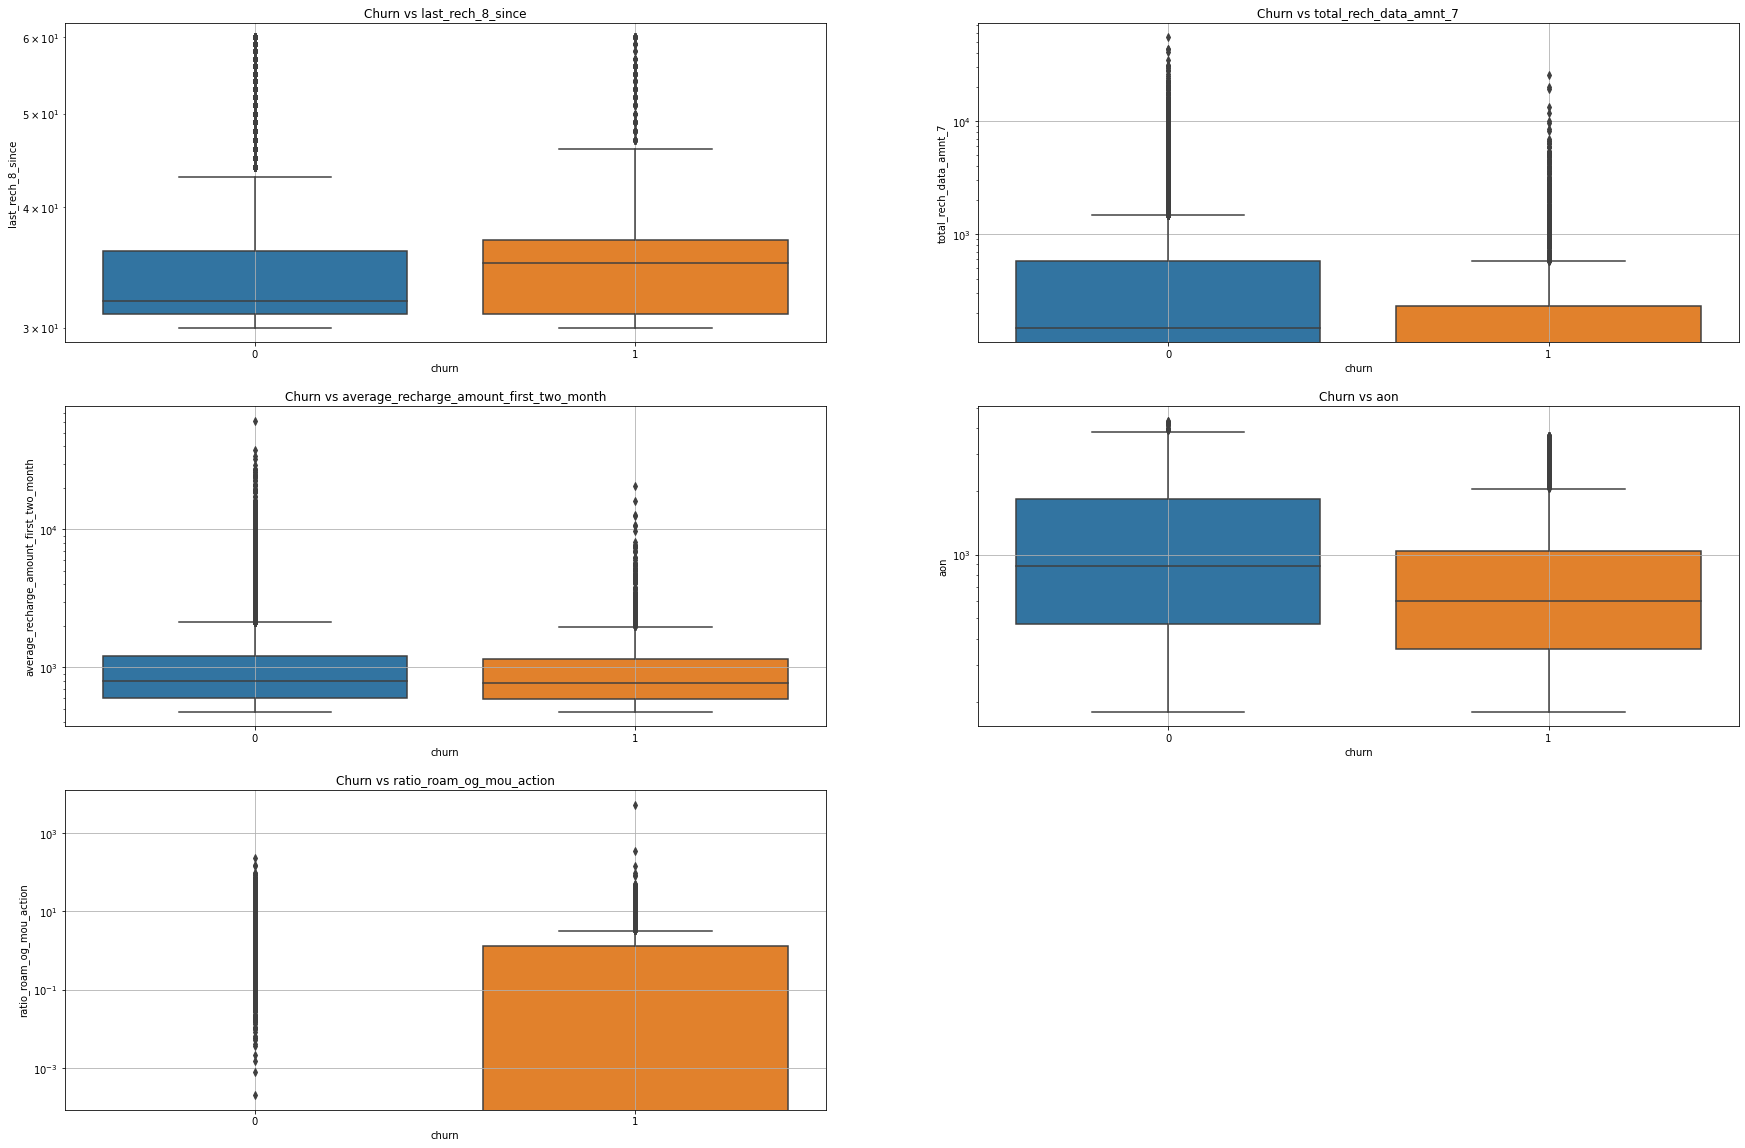

In [51]:
box_plot_y = ["last_rech_8_since", "total_rech_data_amnt_7", "average_recharge_amount_first_two_month", "aon","ratio_roam_og_mou_action"]

eda.boxplot(y=box_plot_y, figsize=(30,20))

**Observation**
1. From the first plot of Churn vs last_rech_8_since , we can infer that people who have churned haven't recharged for a long time as the median of the churn is much higher than the people who havent churned.
2. From the second plot of total_rech_data_amnt_7 , we can see that the number of people who have churned , most of them havent recharged for data in the 7th month.
3. The average recharge amount for the first two months is slightly lower for the people who have churned as well. although there isnt much difference.
4. From the 4th plot we can infer that people who have churned are new to the network as the median for age on network(aon) is lower when compared to the people who havent churned.
5. We can see from the 5th plot that people who have churned were high users of roaming services when compared to people who havent churned.


## 6.4 Pairplot & Distribution plot

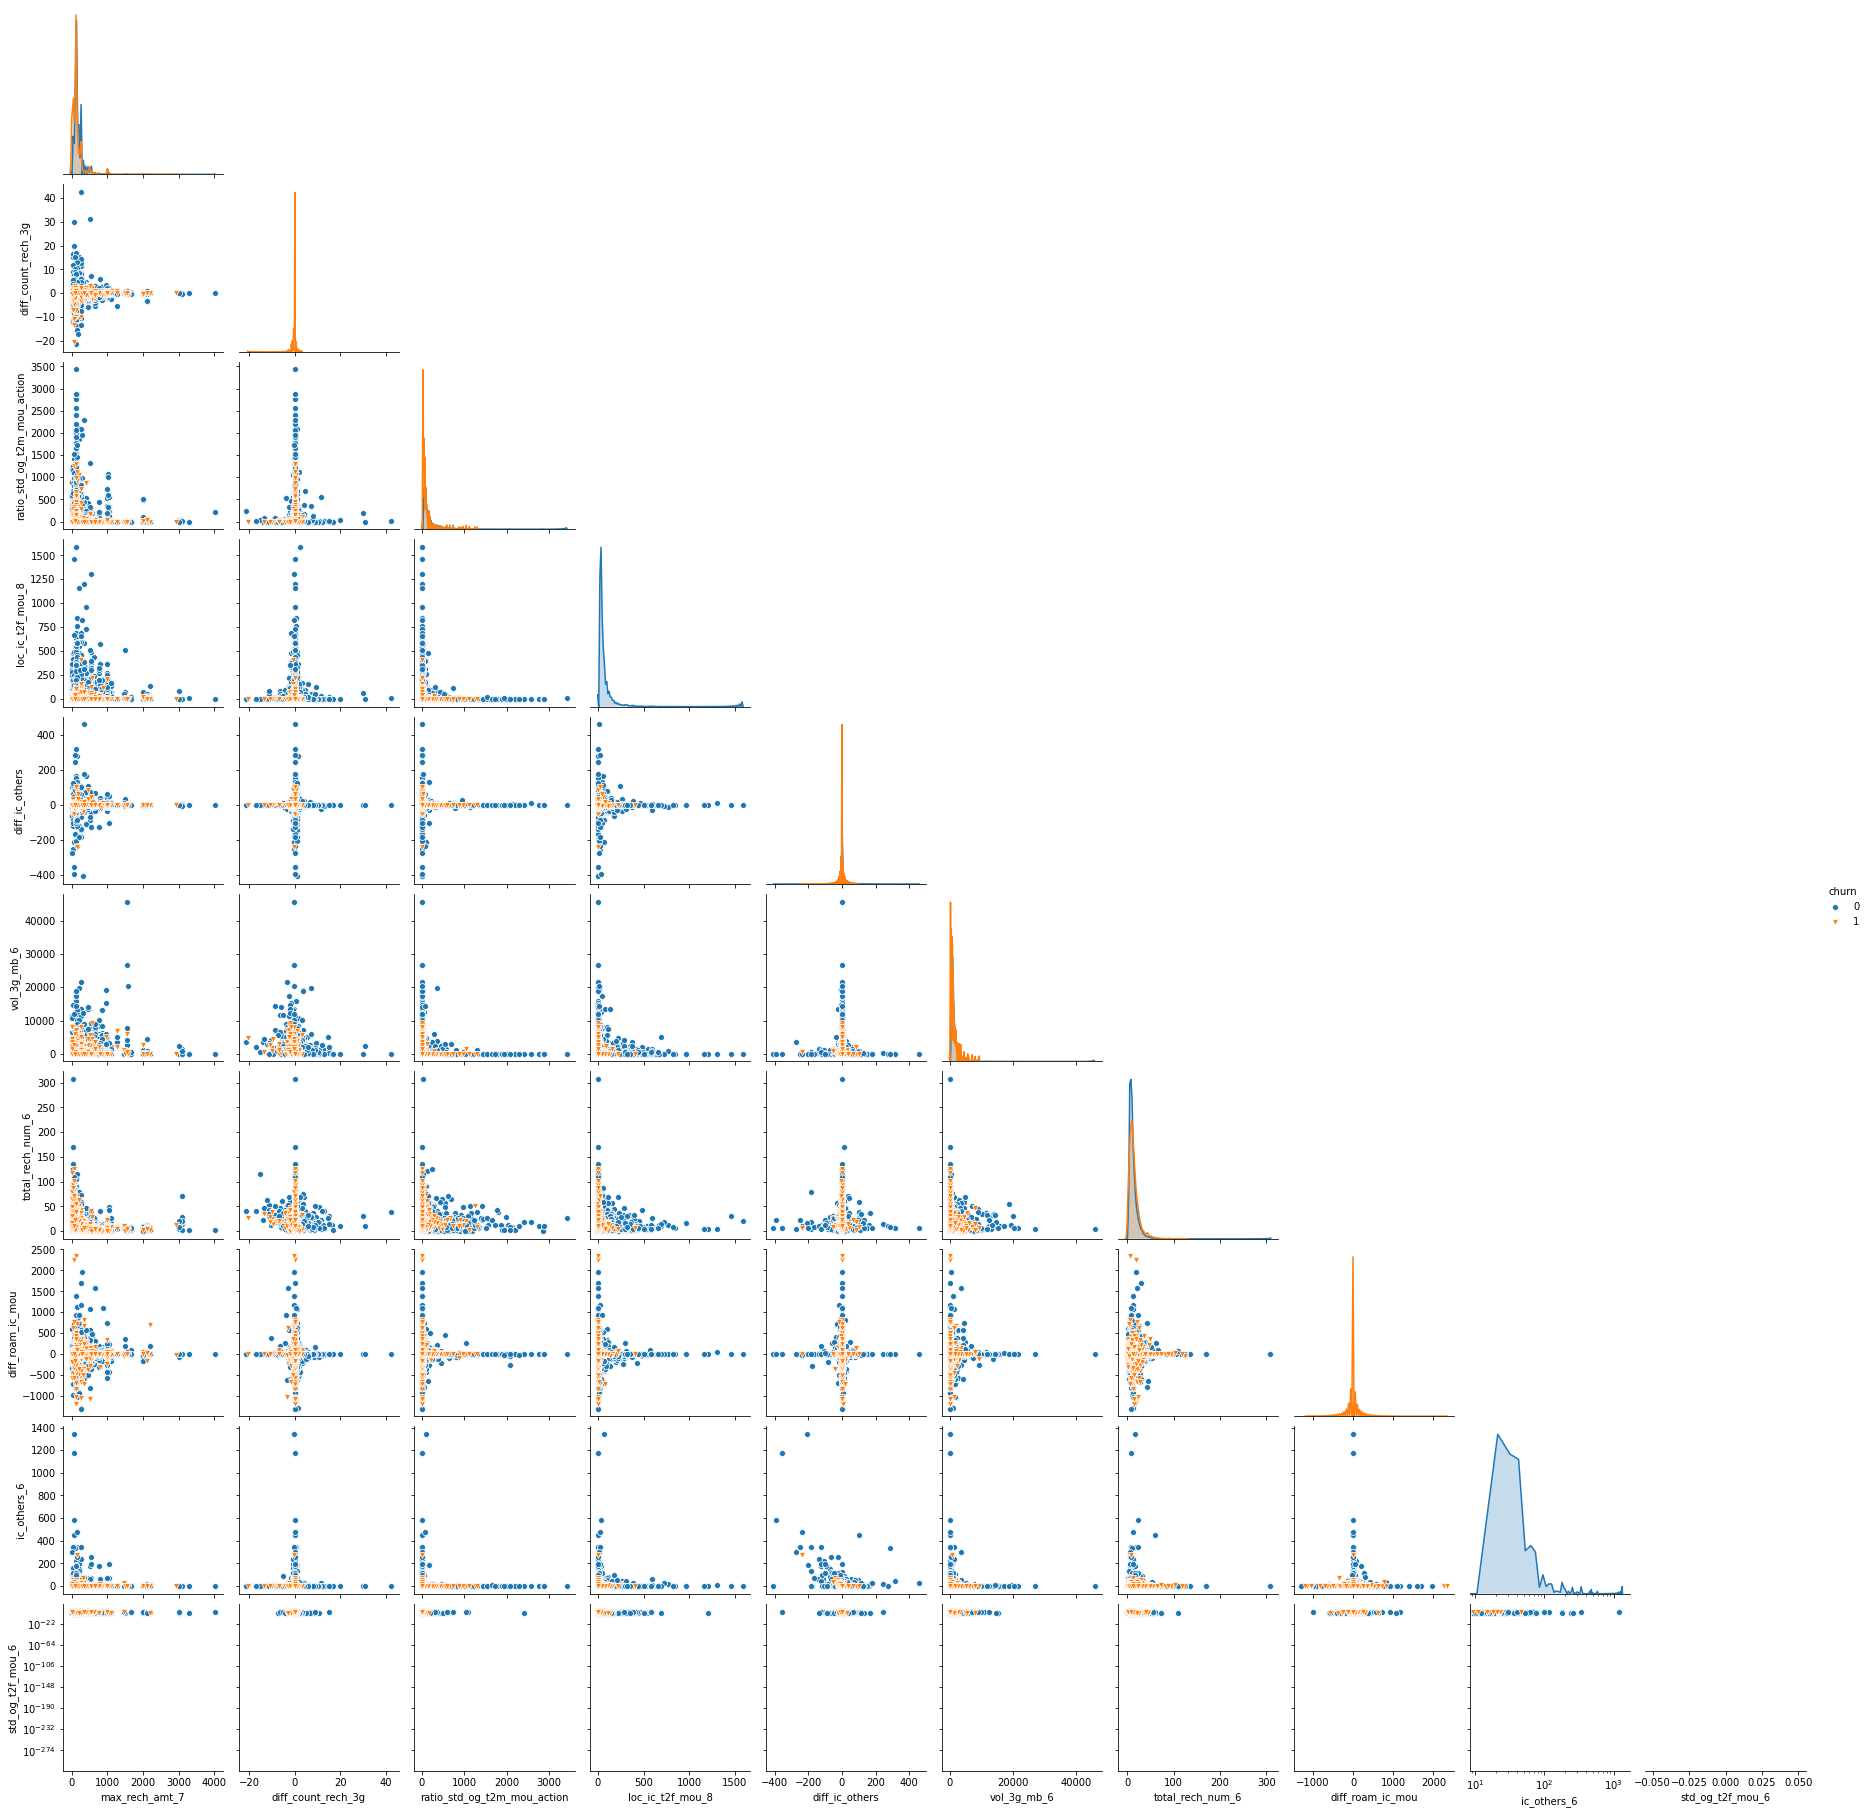

In [52]:
sample_telecom_data = telecom_data_high_value[num_vars].sample(10, axis=1, random_state=100)
sample_telecom_data["churn"] = telecom_data_high_value["churn"]
sns.pairplot(sample_telecom_data, hue="churn", markers=["o", "v"], corner=True)
plt.xscale("log")
plt.yscale("log")
plt.show()

**Observation**
1. From above pairplot we can see vol_2g_mb_6 ,arpu_2g_8 look like they are good predictors of churn.
2. max_rech_amt_6, av_rech_amt_data_7,std_og_t2t_mou_7 look good. although there is some overlap in prediction.

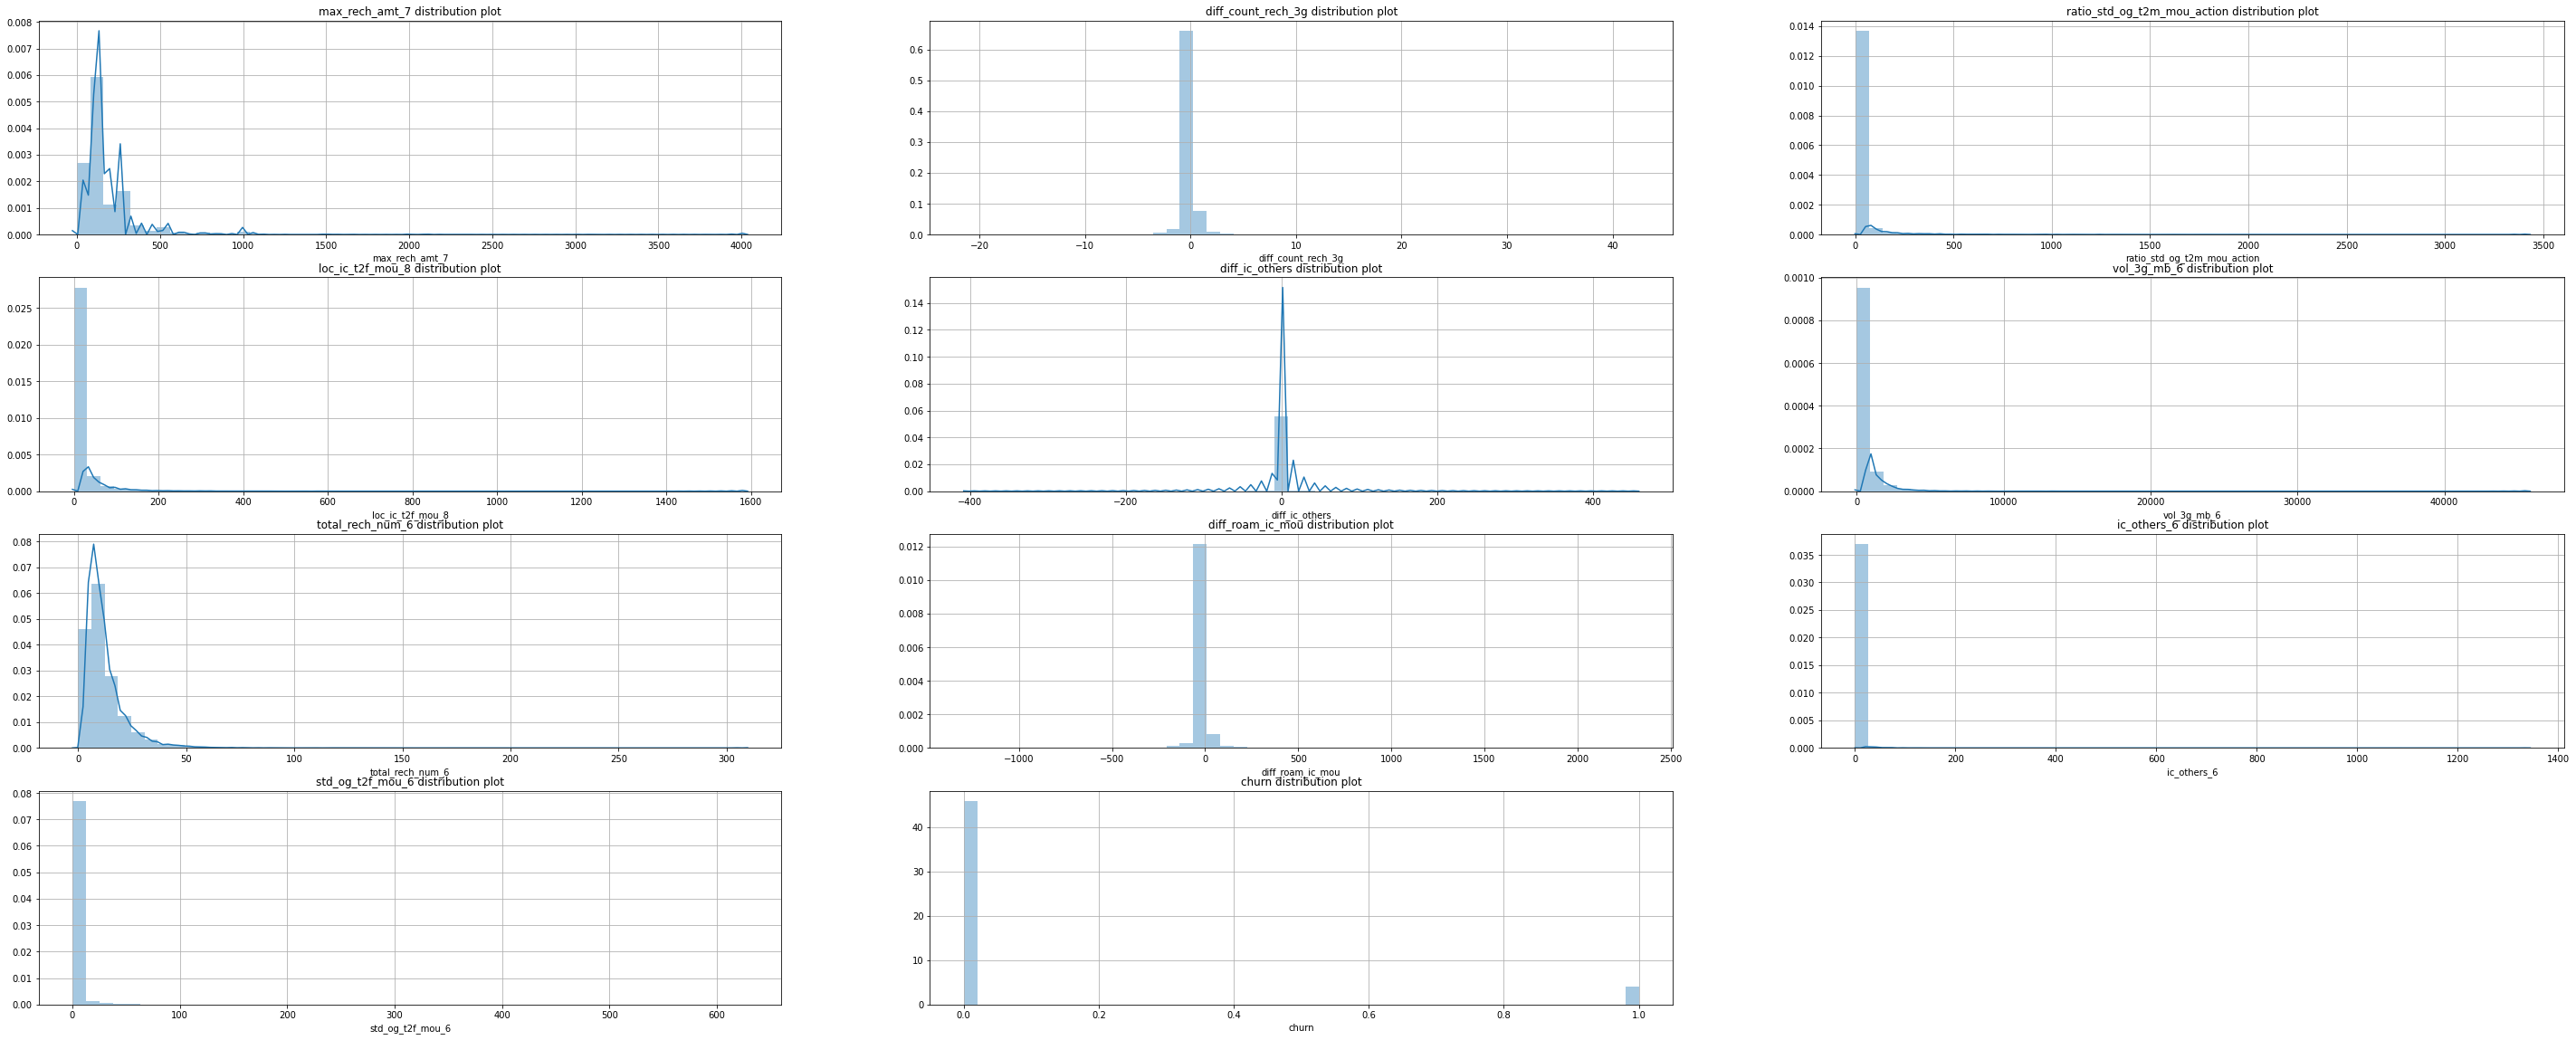

In [53]:
eda = EDA(sample_telecom_data)
eda.distplot(sample_telecom_data.columns, figsize=(50,20))

# 7. Preprocessing & Outlier treatment

In [ ]:
def ksigma_outlier_treatment(df, k=3):
    # calculate summary statistics
    df_mean, df_std = df.mean(), df.std()
    # identify outliers
    cut_off = df_std * k
    lower, upper = df_mean - cut_off, df_mean + cut_off

    # If we remove the outliers then each attribute will have different number of rows
    # If we dont remove it then outlier will take the values as NaN
    # Conclusion: We can replace the outliers with the lower and upper bound
    return [round(lower,2) if x<lower else round(upper,2) if x>upper  else x for x in df ]



In [ ]:
telecom_data_high_value[num_vars] = telecom_data_high_value[num_vars].apply(ksigma_outlier_treatment)
#  Copying the dataset so that we can use them in tree based models without preprocessing
telecom_data_high_value_tree = telecom_data_high_value.copy()

In [ ]:
import pickle as pkl
# To save the final file
with open("final_telecom.csv", 'wb') as file:
    pkl.dump(telecom_data_high_value, file)

In [ ]:
# import pickle as pkl
# # To load file
# with open("final_telecom.csv", 'rb') as file:
#     telecom_data_high_value = pkl.load(file)

# num_vars = telecom_data_high_value.select_dtypes(exclude=["object"]).columns.tolist()
# cat_vars = telecom_data_high_value.select_dtypes(include=["object"]).columns.tolist()
# num_vars.remove("churn")

## 7.1 Dummy variables creation

In [ ]:
dummy_vars_df = pd.get_dummies(telecom_data_high_value[cat_vars], drop_first=True)

# Concatinating the orignial df with dummy df
telecom_data_high_value = pd.concat([telecom_data_high_value, dummy_vars_df], axis=1)

telecom_data_high_value.drop(cat_vars, axis=1, inplace=True)

## 7.2 Train & Test Split

In [ ]:
Y = telecom_data_high_value.pop("churn")
X_train, X_test, y_train, y_test = train_test_split(telecom_data_high_value, Y, train_size=0.7, random_state=SEED, stratify=Y)

X_train.shape, X_test.shape

((21000, 442), (9001, 442))

In [ ]:
print(y_train.value_counts()*100/len(y_train))
print(y_test.value_counts()*100/len(y_test))

0    91.861905
1     8.138095
Name: churn, dtype: float64
0    91.86757
1     8.13243
Name: churn, dtype: float64


**Observation**
1. We have almost same proportion of datapoints from each class in train and test dataset.

## 7.3 Standardizing Numerical Features

In [ ]:
sc = StandardScaler()
X_train[num_vars] = sc.fit_transform(X_train[num_vars]) # Learning mean and std from train data and transforming it
X_test[num_vars] = sc.transform(X_test[num_vars]) # Applying learnt mean and std from train and transforming it

# 8. Models

In [ ]:
class Reporting(object):
    def __init__(self, model, hyper_param_report, X_train, X_test, y_train, y_test):
        self.model = model
        self.hyper_param_report = hyper_param_report
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.y_train_pred = []
        self.y_test_pred = []
        self.train_accuracy = 0
        self.train_auc = 0
        self.train_sensitivity = 0
        self.train_specificity = 0
        self.test_accuracy = 0
        self.test_auc = 0
        self.test_sensitivity = 0
        self.test_specificity = 0

    def predict(self):
        self.y_train_pred = self.model.predict(self.X_train)
        self.y_test_pred = self.model.predict(self.X_test)
        

    def generate_report(self):
        self.predict()
        print("Train Classification Report\n", classification_report(self.y_train, self.y_train_pred))
        print("Train AUC Score", roc_auc_score(self.y_train, self.y_train_pred))
        conf_mat_train = confusion_matrix(self.y_train, self.y_train_pred)
        sns.heatmap(conf_mat_train, annot=True, fmt="g")
        plt.title("Train Confusion matrix")
        plt.show()

        print("Test Classification Report\n", classification_report(self.y_test, self.y_test_pred))
        print("Test AUC Score", roc_auc_score(self.y_test, self.y_test_pred))
        conf_mat_test = confusion_matrix(self.y_test, self.y_test_pred)
        sns.heatmap(conf_mat_test, annot=True, fmt="g")
        plt.title("Test Confusion matrix")
        plt.show()

    def metrics(self):
        train_report =  classification_report(self.y_train, self.y_train_pred, output_dict=True)
        test_report = classification_report(self.y_test, self.y_test_pred, output_dict=True)
        
        self.train_accuracy, self.test_accuracy = round(train_report["accuracy"], 2), round(test_report["accuracy"], 2)
        self.train_sensitivity, self.test_sensitivity = round(train_report["1"]["recall"], 2), round(test_report["1"]["recall"], 2)
        self.train_specificity, self.test_specificity = round(train_report["0"]["recall"], 2), round(test_report["0"]["recall"], 2)
        self.train_auc, self.test_auc = round(roc_auc_score(self.y_train, self.y_train_pred), 2), round(roc_auc_score(self.y_test, self.y_test_pred), 2)

    def plot_train_test_auc(self, x="param_C", param_name="Lambda"):
        plt.figure(figsize=(16,8))
        sns.lineplot(self.hyper_param_report[x], self.hyper_param_report['mean_train_score'])
        sns.lineplot(self.hyper_param_report[x], self.hyper_param_report['mean_test_score'])
        plt.ylabel('AUC Score')
        plt.xlabel(param_name)
        if x=="param_C":
            plt.xscale("log")
        plt.legend(['train score', 'test score'], loc='upper left')
        plt.title(param_name+" vs AUC Score")
        plt.grid()
        plt.show()

    def model_summary(self, model_name):
        self.metrics()
        from prettytable import PrettyTable
        # Creating pretty table
        pt = PrettyTable()

        pt.field_names = ["Model Name", "Train Accuracy", "Test Accuracy", "Train AUC", "Test AUC",
                          "Train Sensitivity", "Test Sensitivity", "Train Specificity", "Test Specificity"]

        pt.add_row([model_name, self.train_accuracy, self.test_accuracy, self.train_auc, self.test_auc,
                    self.train_sensitivity, self.test_sensitivity, self.train_specificity, self.test_specificity])
        print(pt)

## 8.1 Random Model (Baseline)

In [ ]:
y_train.value_counts()

0    19291
1     1709
Name: churn, dtype: int64

In [ ]:
naive_model_train_predict = [0]*y_train.shape[0]
naive_model_test_predict = [0]*y_test.shape[0]

Train Classification Report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     19291
           1       0.00      0.00      0.00      1709

    accuracy                           0.92     21000
   macro avg       0.46      0.50      0.48     21000
weighted avg       0.84      0.92      0.88     21000

Train AUC Score 0.5


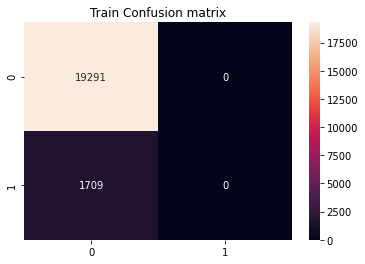

In [ ]:
print("Train Classification Report\n", classification_report(y_train, naive_model_train_predict))
print("Train AUC Score", roc_auc_score(y_train, naive_model_train_predict))
conf_mat_train = confusion_matrix(y_train, naive_model_train_predict)
sns.heatmap(conf_mat_train, annot=True, fmt="g")
plt.title("Train Confusion matrix")
plt.show()

Test Classification Report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      8269
           1       0.00      0.00      0.00       732

    accuracy                           0.92      9001
   macro avg       0.46      0.50      0.48      9001
weighted avg       0.84      0.92      0.88      9001

Test AUC Score 0.5


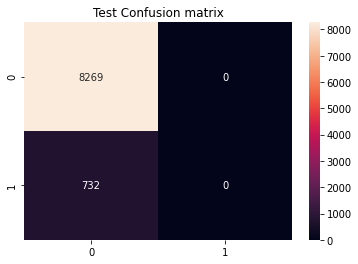

In [ ]:
print("Test Classification Report\n", classification_report(y_test, naive_model_test_predict))
print("Test AUC Score", roc_auc_score(y_test, naive_model_test_predict))
conf_mat_test = confusion_matrix(y_test, naive_model_test_predict)
sns.heatmap(conf_mat_test, annot=True, fmt="g")
plt.title("Test Confusion matrix")
plt.show()

**Observation**
1. As we can see our random naive model which just simply predicts as not churn, gives higher accuracy hence, the accuracy can't be a good measure to evaluate our model.
2. On the other hand, AUC score is 0.5 for both the model, we can use it as evaluation metric to judge our models.
3. Also, we can take a look at recall value for positive and negative class.

**Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.**

## 8.1 PCA

### 8.1.1 Identifying n_components to reduce the dimension

In [ ]:
pca = PCA(random_state=SEED)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

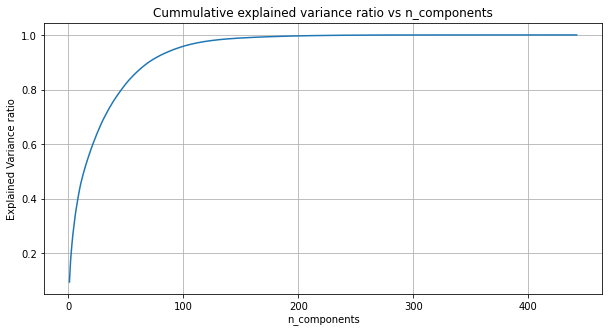

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Explained Variance ratio")
plt.title("Cummulative explained variance ratio vs n_components")
plt.show()

**Observation**
1. Around 140-150 n_components explain 100% variance. We can take n_components as 130 and build logistic regression on that.

In [ ]:
pca = PCA(n_components=140, random_state=SEED)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((21000, 140), (9001, 140))

### 8.1.2 Logistic Regression on reduced features + Hyperparameter tuning

In [ ]:
y_train.value_counts()/len(y_train)

0    0.918619
1    0.081381
Name: churn, dtype: float64

In [ ]:
params = dict(C=[0.0001, 0.1, 0.11, 0.12, 0.15, 0.5, 0.6, 0.7, 0.8, 1, 4, 8, 
                 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 60, 100, 1000],
              random_state=[5, 10, 20, 40, 100],
              class_weight=["balanced", {0:0.081381, 1: 0.918619}],
              penalty=["l1", "l2"])

pca_lr = LogisticRegression()

model_pca = GridSearchCV(estimator=pca_lr,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=5,
                        verbose=1,
                        return_train_score=True,
                        n_jobs=-1
                       )
model_pca.fit(X_train_pca,y_train)

Fitting 5 folds for each of 520 candidates, totalling 2600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 717 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1900 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 2600 out of 2600 | elapsed: 11.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.1, 0.11, 0.12, 0.15, 0.5, 0.6, 0.7,
                               0.8, 1, 4, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26,
                               28, 30, 60, 100, 1000],
                         'class_weight': ['balanced',
                                          {0: 0.081381, 1: 0.918619}],
                

In [ ]:
cv_result_pca = pd.DataFrame(model_pca.cv_results_)
cv_result_pca.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.016336      0.006394              0.0             0.0  0.0001   
1       0.012724      0.003263              0.0             0.0  0.0001   
2       0.010882      0.003940              0.0             0.0  0.0001   
3       0.010380      0.001129              0.0             0.0  0.0001   
4       0.014773      0.003734              0.0             0.0  0.0001   

  param_class_weight param_penalty param_random_state  \
0           balanced            l1                  5   
1           balanced            l1                 10   
2           balanced            l1                 20   
3           balanced            l1                 40   
4           balanced            l1                100   

                                              params  split0_test_score  \
0  {'C': 0.0001, 'class_weight': 'balanced', 'pen...                NaN   
1  {'C': 0.0001, 'class_weight': 'balanced', 'pen...                NaN   
2  {'C': 0.0001, 'class_weight': 'balanced', 'pen...                NaN   
3  {'C': 0.0001, 'class_weight': 'balanced', 'pen...                NaN   
4  {'C': 0.0001, 'class_weight': 'balanced', 'pen...                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN              520                 NaN   
1              NaN             NaN              315                 NaN   
2              NaN             NaN              316                 NaN   
3              NaN             NaN              317                 NaN   
4              NaN             NaN              328                 NaN   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1                 NaN               NaN              NaN  
2                 NaN               NaN              NaN  
3                 NaN               NaN              NaN  
4                 NaN               NaN              NaN

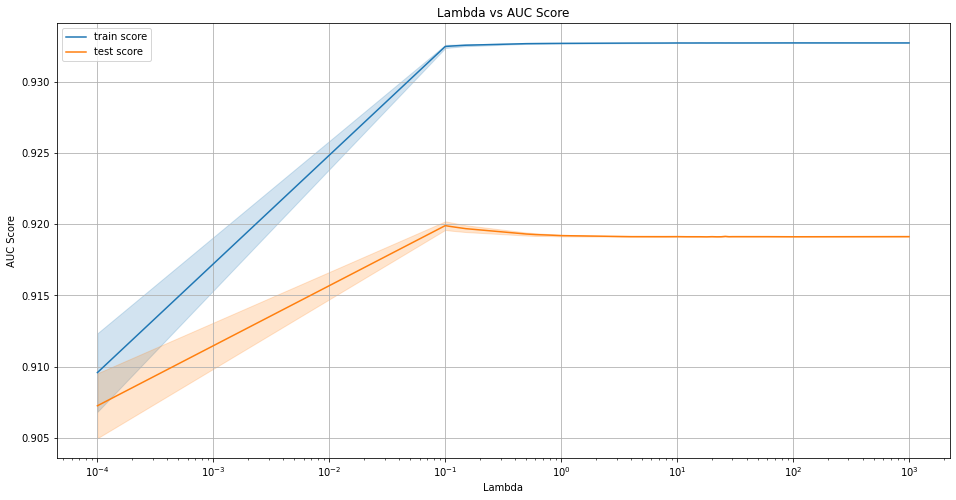

In [ ]:
reporting_pca = Reporting(model_pca, cv_result_pca, X_train_pca, X_test_pca, y_train, y_test)
reporting_pca.plot_train_test_auc()

In [ ]:
best_param_pca = model_pca.best_params_
best_param_pca

{'C': 0.1,
 'class_weight': {0: 0.081381, 1: 0.918619},
 'penalty': 'l2',
 'random_state': 5}

Train Classification Report
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     19291
           1       0.36      0.87      0.51      1709

    accuracy                           0.86     21000
   macro avg       0.67      0.86      0.71     21000
weighted avg       0.94      0.86      0.89     21000

Train AUC Score 0.8639799317641885


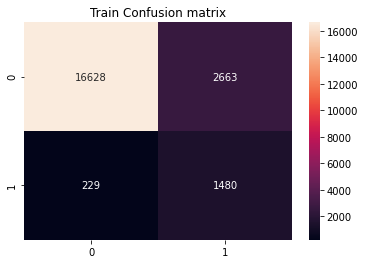

Test Classification Report
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      8269
           1       0.35      0.86      0.50       732

    accuracy                           0.86      9001
   macro avg       0.67      0.86      0.71      9001
weighted avg       0.93      0.86      0.89      9001

Test AUC Score 0.8598481919764847


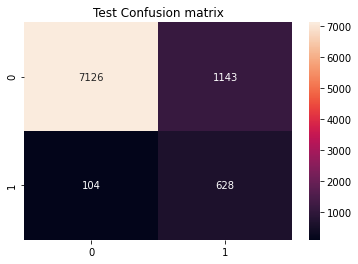

In [ ]:
pca_lr = LogisticRegression(**best_param_pca)
pca_lr.fit(X_train_pca, y_train)

reporting_pca.model = pca_lr

reporting_pca.generate_report()

In [ ]:
reporting_pca.model_summary("PCA Logistic Regression")

+-------------------------+----------------+---------------+-----------+----------+-------------------+------------------+-------------------+------------------+
|        Model Name       | Train Accuracy | Test Accuracy | Train AUC | Test AUC | Train Sensitivity | Test Sensitivity | Train Specificity | Test Specificity |
+-------------------------+----------------+---------------+-----------+----------+-------------------+------------------+-------------------+------------------+
| PCA Logistic Regression |      0.86      |      0.86     |    0.86   |   0.86   |        0.87       |       0.86       |        0.86       |       0.86       |
+-------------------------+----------------+---------------+-----------+----------+-------------------+------------------+-------------------+------------------+


## 8.2 Logistic Regression + Hyperparameter Tuning



In [ ]:
params = dict(C=[0.0001, 0.001, 0.01, 0.05, 0.06, 0.09, 0.1, 0.11, 0.12, 0.15,
                 0.5, 0.6, 0.7, 0.8, 1, 4, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26,
                 28, 30, 60, 100, 1000],
              random_state=[5],
              class_weight=[{0:0.081381, 1: 0.918619}],
              penalty=["l2"])

lr = LogisticRegression()

model_lr = GridSearchCV(estimator=lr,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=5,
                        verbose=1,
                        return_train_score=True,
                        n_jobs=-1
                       )
model_lr.fit(X_train, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.05, 0.06, 0.09, 0.1, 0.11,
                               0.12, 0.15, 0.5, 0.6, 0.7, 0.8, 1, 4, 8, 10, 12,
                               14, 16, 18, 20, 22, 24, 26, 28, 30, 60, 100, ...],
                         'class_weight': [{0: 0.081381, 1: 0.918619}],
                         'penalty': ['l2

In [ ]:
cv_result_lr = pd.DataFrame(model_lr.cv_results_)
cv_result_lr.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.548827      0.015152         0.018723        0.001682  0.0001   
1       0.634326      0.016543         0.016774        0.001853   0.001   
2       1.383135      0.057577         0.017680        0.002187    0.01   
3       2.155619      0.054741         0.016505        0.001241    0.05   
4       2.321226      0.103621         0.019271        0.002325    0.06   

           param_class_weight param_penalty param_random_state  \
0  {0: 0.081381, 1: 0.918619}            l2                  5   
1  {0: 0.081381, 1: 0.918619}            l2                  5   
2  {0: 0.081381, 1: 0.918619}            l2                  5   
3  {0: 0.081381, 1: 0.918619}            l2                  5   
4  {0: 0.081381, 1: 0.918619}            l2                  5   

                                              params  split0_test_score  \
0  {'C': 0.0001, 'class_weight': {0: 0.081381, 1:...           0.894465   
1  {'C': 0.001, 'class_weight': {0: 0.081381, 1: ...           0.902612   
2  {'C': 0.01, 'class_weight': {0: 0.081381, 1: 0...           0.910201   
3  {'C': 0.05, 'class_weight': {0: 0.081381, 1: 0...           0.911864   
4  {'C': 0.06, 'class_weight': {0: 0.081381, 1: 0...           0.911931   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.914976           0.904841           0.897189           0.905714   
1           0.923032           0.916222           0.904647           0.917935   
2           0.927480           0.925615           0.911038           0.929327   
3           0.927087           0.926386           0.911317           0.929775   
4           0.926926           0.926328           0.911228           0.929508   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.903437        0.007209               31            0.907303   
1         0.912890        0.007912               30            0.919123   
2         0.920732        0.008344                4            0.931617   
3         0.921286        0.007999                1            0.936414   
4         0.921184        0.007918                2            0.936832   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.902315            0.904183            0.907404   
1            0.914894            0.915614            0.918844   
2            0.927784            0.927799            0.931252   
3            0.932947            0.932663            0.936056   
4            0.933425            0.933063            0.936430   

   split4_train_score  mean_train_score  std_train_score  
0            0.903838          0.905008         0.002016  
1            0.914640          0.916623         0.001956  
2            0.926711          0.929033         0.002004  
3            0.932290          0.934074         0.001781  
4            0.932808          0.934512         0.001746

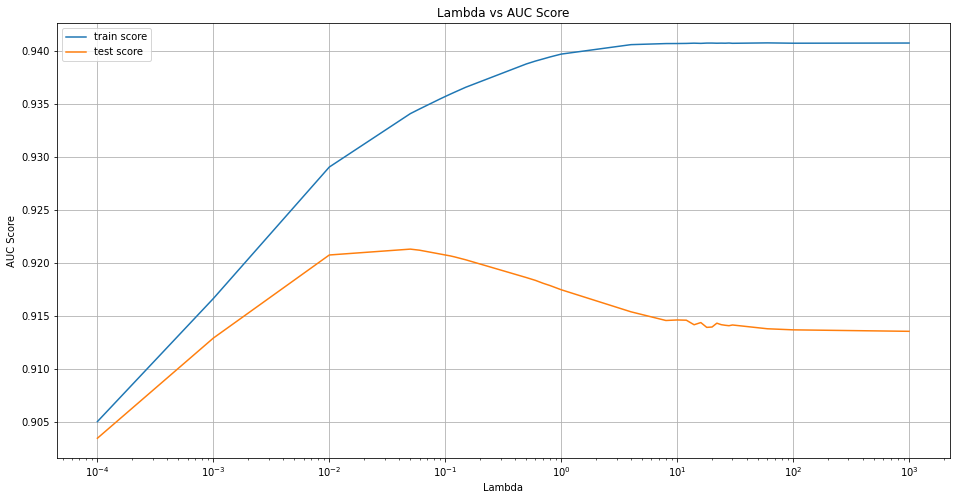

In [ ]:
reporting_lr = Reporting(model_lr, cv_result_lr, X_train, X_test, y_train, y_test)
reporting_lr.plot_train_test_auc()

In [ ]:
best_param_lr = model_lr.best_params_
best_param_lr

{'C': 0.05,
 'class_weight': {0: 0.081381, 1: 0.918619},
 'penalty': 'l2',
 'random_state': 5}

Train Classification Report
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     19291
           1       0.36      0.87      0.51      1709

    accuracy                           0.86     21000
   macro avg       0.67      0.87      0.72     21000
weighted avg       0.94      0.86      0.89     21000

Train AUC Score 0.8664351524868465


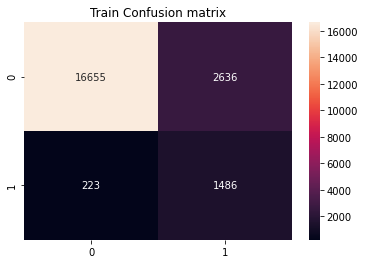

Test Classification Report
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      8269
           1       0.36      0.85      0.50       732

    accuracy                           0.86      9001
   macro avg       0.67      0.86      0.71      9001
weighted avg       0.93      0.86      0.89      9001

Test AUC Score 0.8592502149380099


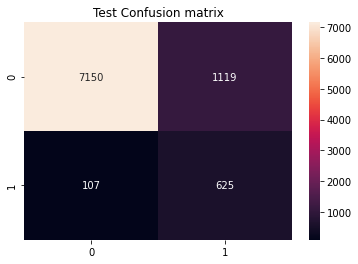

In [ ]:
lr = LogisticRegression(**best_param_lr)
lr.fit(X_train, y_train)

reporting_lr.model = lr

reporting_lr.generate_report()

In [ ]:
reporting_lr.model_summary("Logistic Regression")

+---------------------+----------------+---------------+-----------+----------+-------------------+------------------+-------------------+------------------+
|      Model Name     | Train Accuracy | Test Accuracy | Train AUC | Test AUC | Train Sensitivity | Test Sensitivity | Train Specificity | Test Specificity |
+---------------------+----------------+---------------+-----------+----------+-------------------+------------------+-------------------+------------------+
| Logistic Regression |      0.86      |      0.86     |    0.87   |   0.86   |        0.87       |       0.85       |        0.86       |       0.86       |
+---------------------+----------------+---------------+-----------+----------+-------------------+------------------+-------------------+------------------+


In [ ]:
importance_lr = lr.coef_[0]
importance_lr_df = pd.DataFrame(dict(Feature=X_train.columns, Coef=importance_lr))
importance_lr_df = importance_lr_df.sort_values("Coef", ascending=False).head(10)
importance_lr_df

Feature      Coef
183  ratio_roam_og_mou_action  0.278295
23           loc_og_t2f_mou_8  0.213471
191   ratio_loc_og_mou_action  0.208579
166        total_max_rech_amt  0.184819
11              roam_ic_mou_8  0.181392
140       diff_loc_og_t2c_mou  0.150930
38           std_og_t2f_mou_8  0.124983
290             sachet_2g_8_2  0.118925
115                 arpu_3g_6  0.117571
228             sachet_2g_6_4  0.116026

## 8.3 XGBoostClassifier + Hyperparameter tuning

In [ ]:
Y_tree = telecom_data_high_value_tree.pop("churn") 
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(telecom_data_high_value_tree, Y_tree, train_size=0.7, random_state=5, stratify=Y_tree)

X_train_tree.shape, X_test_tree.shape

((21000, 223), (9001, 223))

In [ ]:
print(y_train_tree.value_counts()*100/len(y_train))
print(y_test_tree.value_counts()*100/len(y_test))

0    91.861905
1     8.138095
Name: churn, dtype: float64
0    91.86757
1     8.13243
Name: churn, dtype: float64


In [ ]:
import xgboost as xgb

params = dict(n_estimators=[10, 20, 40, 60, 80, 90, 100, 200, 500, 1000],
              eval_metric=["auc"],
              seed=[5],
              early_stopping_rounds=[3],
              objective=["binary:logistic"]
              )
weight_ratio = float(len(y_train_tree[y_train == 0]))/float(len(y_train[y_train_tree == 1]))
w_array = np.array([1]*y_train_tree.shape[0])
w_array[y_train==1] = weight_ratio
w_array[y_train==0] = 1- weight_ratio
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

xgbc = xgb.XGBClassifier(n_jobs=-1)

model_xgbc = GridSearchCV(estimator=xgbc,
                                param_grid=params,
                                scoring='roc_auc',
                                cv=folds,
                                verbose=1,
                                return_train_score=True,
                                n_jobs=-1
                       )

model_xgbc.fit(X_train_tree.values, y_train_tree, sample_weight=w_array)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 21.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:log...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'early_stopping_rounds': [3], 'eval_metric': ['auc'],
                         'n_estimators': [10, 20, 40, 60, 80, 90, 100, 200, 500,
                                 

In [ ]:
cv_result_xgbc = pd.DataFrame(model_xgbc.cv_results_)
cv_result_xgbc.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.164217      0.141185         0.068033        0.016481   
1       5.627625      0.147084         0.054587        0.000467   
2      10.226238      0.132262         0.058046        0.000589   
3      14.533651      0.059335         0.061885        0.000465   
4      19.160672      0.172756         0.068336        0.002547   

  param_early_stopping_rounds param_eval_metric param_n_estimators  \
0                           3               auc                 10   
1                           3               auc                 20   
2                           3               auc                 40   
3                           3               auc                 60   
4                           3               auc                 80   

   param_objective param_scale_pos_weight param_seed  \
0  binary:logistic                  11.29          5   
1  binary:logistic                  11.29          5   
2  binary:logistic                  11.29          5   
3  binary:logistic                  11.29          5   
4  binary:logistic                  11.29          5   

                                              params  split0_test_score  \
0  {'early_stopping_rounds': 3, 'eval_metric': 'a...           0.937528   
1  {'early_stopping_rounds': 3, 'eval_metric': 'a...           0.948362   
2  {'early_stopping_rounds': 3, 'eval_metric': 'a...           0.956204   
3  {'early_stopping_rounds': 3, 'eval_metric': 'a...           0.957739   
4  {'early_stopping_rounds': 3, 'eval_metric': 'a...           0.958358   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.937291           0.927262           0.935974           0.943210   
1           0.944768           0.939598           0.942455           0.950470   
2           0.953801           0.948969           0.952327           0.955695   
3           0.956962           0.952501           0.955518           0.957297   
4           0.957962           0.954094           0.958163           0.958201   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.936253        0.005139               10            0.942423   
1         0.945131        0.003920                9            0.954736   
2         0.953399        0.002611                7            0.965388   
3         0.956003        0.001903                5            0.971390   
4         0.957356        0.001636                2            0.975091   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.942846            0.940598            0.946362   
1            0.953428            0.954453            0.956069   
2            0.965515            0.966544            0.966520   
3            0.970904            0.972358            0.971777   
4            0.974291            0.976140            0.975947   

   split4_train_score  mean_train_score  std_train_score  
0            0.942796          0.943005         0.001869  
1            0.953553          0.954448         0.000954  
2            0.965146          0.965823         0.000591  
3            0.971063          0.971499         0.000524  
4            0.975359          0.975366         0.000658

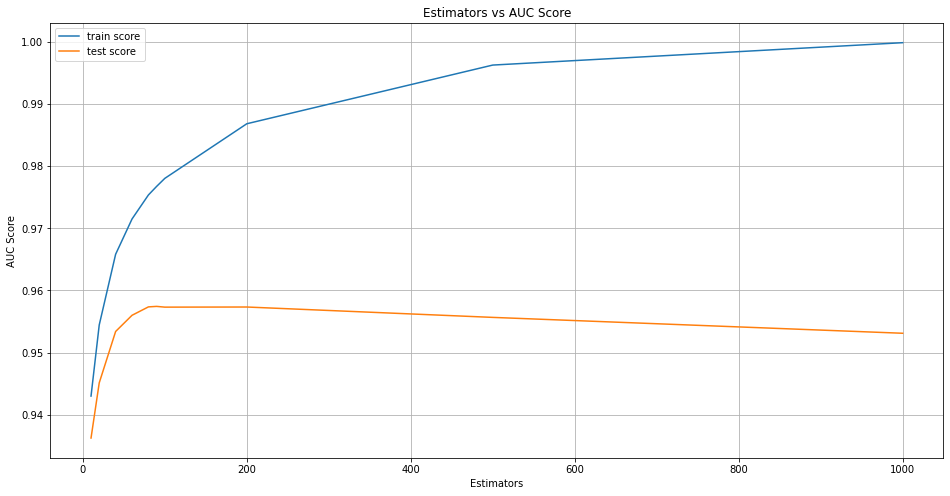

In [ ]:
reporting_xgbc = Reporting(model_xgbc, cv_result_xgbc, X_train_tree.values, X_test_tree.values, y_train_tree, y_test_tree)
reporting_xgbc.plot_train_test_auc("param_n_estimators", "Estimators")

In [ ]:
best_param_xgbc = model_xgbc.best_params_
best_param_xgbc

{'early_stopping_rounds': 3,
 'eval_metric': 'auc',
 'n_estimators': 90,
 'objective': 'binary:logistic',
 'scale_pos_weight': 11.29,
 'seed': 5}

Train Classification Report
               precision    recall  f1-score   support

           0       0.99      0.92      0.96     19291
           1       0.52      0.92      0.66      1709

    accuracy                           0.92     21000
   macro avg       0.76      0.92      0.81     21000
weighted avg       0.95      0.92      0.93     21000

Train AUC Score 0.9222654937305115


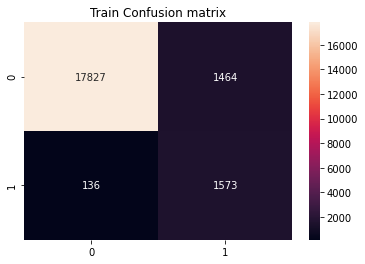

Test Classification Report
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      8269
           1       0.48      0.86      0.62       732

    accuracy                           0.91      9001
   macro avg       0.73      0.89      0.78      9001
weighted avg       0.95      0.91      0.92      9001

Test AUC Score 0.8876449964215548


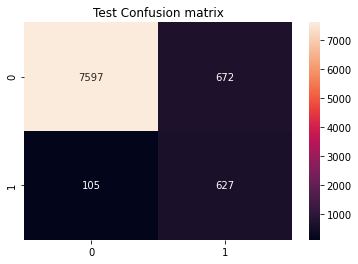

In [ ]:
xgbc = xgb.XGBClassifier(**best_param_xgbc, n_jobs=-1)
xgbc.fit(X_train_tree.values, y_train_tree)

reporting_xgbc.model = xgbc

reporting_xgbc.generate_report()

In [ ]:
reporting_xgbc.model_summary("XGBoost Classifier")

+--------------------+----------------+---------------+-----------+----------+-------------------+------------------+-------------------+------------------+
|     Model Name     | Train Accuracy | Test Accuracy | Train AUC | Test AUC | Train Sensitivity | Test Sensitivity | Train Specificity | Test Specificity |
+--------------------+----------------+---------------+-----------+----------+-------------------+------------------+-------------------+------------------+
| XGBoost Classifier |      0.92      |      0.91     |    0.92   |   0.89   |        0.92       |       0.86       |        0.92       |       0.92       |
+--------------------+----------------+---------------+-----------+----------+-------------------+------------------+-------------------+------------------+


# 9. Conclusion
1. If we look at the top 10 features obtained from logistic regression, mainly roaming related features are present. This is a strong indicator that the company should provide affordable roaming packs which will also affect the total amount recharge and overall this will reduce the churn rate.
2. Also sachet pack of 2g data affects the churn rate, we would suggest the company to provide the sachet for with more validty so that customer can use the sachet at same rate for more days, it can help in customer retention.
3. Also, provide the STD packs at affordable rate.